# FRP Global Analysis Without 95 Percentile @ Without Grid

In [1]:
import geopandas as gpd
import rasterio
from rasterstats import point_query

# Load shapefile data (MODIS Fire Points)
FRP = gpd.read_file("/Users/ceedindia/Documents/FIRE/Final_FRP_filtered_New.shp")

# Mean Without 95 Percentile @ Without Grid

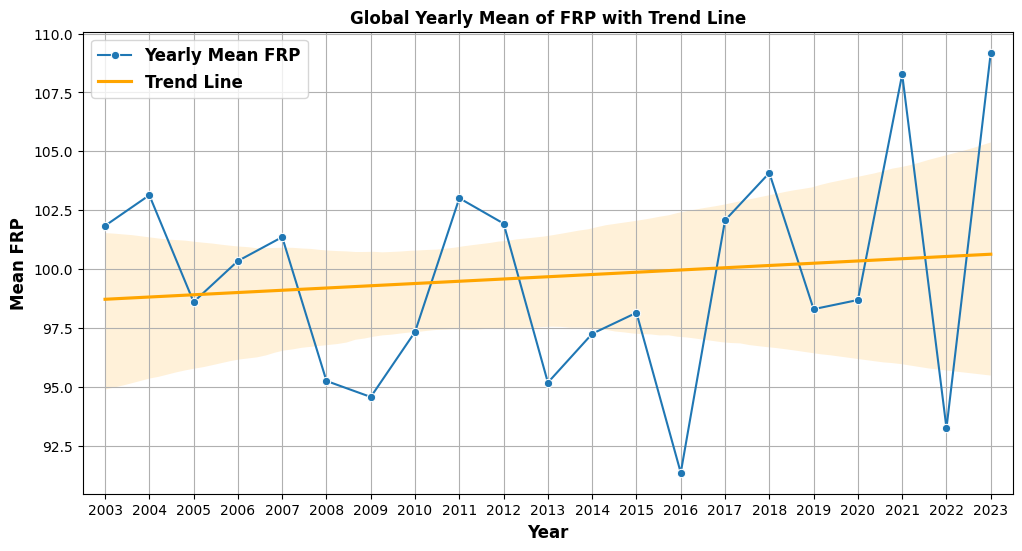

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming FRP data is already loaded as a DataFrame named 'FRP'

# Convert the 'year' column to integer if it's not already
FRP['year'] = FRP['year'].astype(int)

# # Calculate the 95th percentile for the FRP values
# frp_95th_percentile = FRP['frp'].quantile(0.95)

# # Filter the data to include only FRP values below or equal to the 95th percentile
# FRP_filtered = FRP[FRP['frp'] <= frp_95th_percentile]

# Calculate the yearly mean of the filtered FRP data
yearly_mean_frp = FRP.groupby('year')['frp'].mean().reset_index()

# Plot the yearly mean FRP line graph with trend line
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_mean_frp, x='year', y='frp', label='Yearly Mean FRP', marker='o')
sns.regplot(data=yearly_mean_frp, x='year', y='frp', scatter=False, color='orange', label='Trend Line')

# Set x-axis range from 2003 to 2023 and set ticks for each year
plt.xlim(2002.5, 2023.5)
plt.xticks(range(2003, 2024, 1))  # Set ticks for each year

# Customize the plot
plt.title('Global Yearly Mean of FRP with Trend Line', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Mean FRP', fontsize=12, fontweight='bold')
plt.legend(prop={'size': 12, 'weight': 'bold'})
plt.grid(True)
plt.show()

# Sum Without 95 Percentile Without Grid

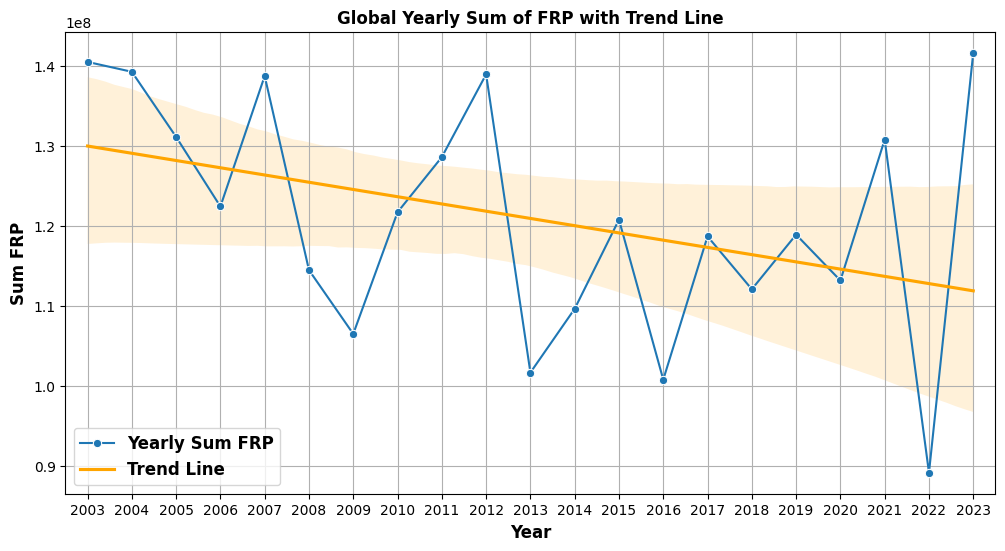

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'year' column to integer if it's not already
FRP['year'] = FRP['year'].astype(int)

# # Calculate the 95th percentile for the FRP values
# frp_95th_percentile = FRP['frp'].quantile(0.95)

# # Filter the data to include only FRP values below or equal to the 95th percentile
# FRP_filtered = FRP[FRP['frp'] <= frp_95th_percentile]

# Calculate the yearly mean of the filtered FRP data
yearly_sum_frp = FRP.groupby('year')['frp'].sum().reset_index()

# Plot the yearly mean FRP line graph with trend line
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sum_frp, x='year', y='frp', label='Yearly Sum FRP', marker='o')
sns.regplot(data=yearly_sum_frp, x='year', y='frp', scatter=False, color='orange', label='Trend Line')

# Set x-axis range from 2003 to 2023 and set ticks for each year
plt.xlim(2002.5, 2023.5)
plt.xticks(range(2003, 2024, 1))  # Set ticks for each year

# Customize the plot
plt.title('Global Yearly Sum of FRP with Trend Line', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Sum FRP', fontsize=12, fontweight='bold')
plt.legend(prop={'size': 12, 'weight': 'bold'})
plt.grid(True)
plt.show()

# Tau Cluster wise yearly MEAN FRP Trend [Without 95 percentile] @ Without Grid

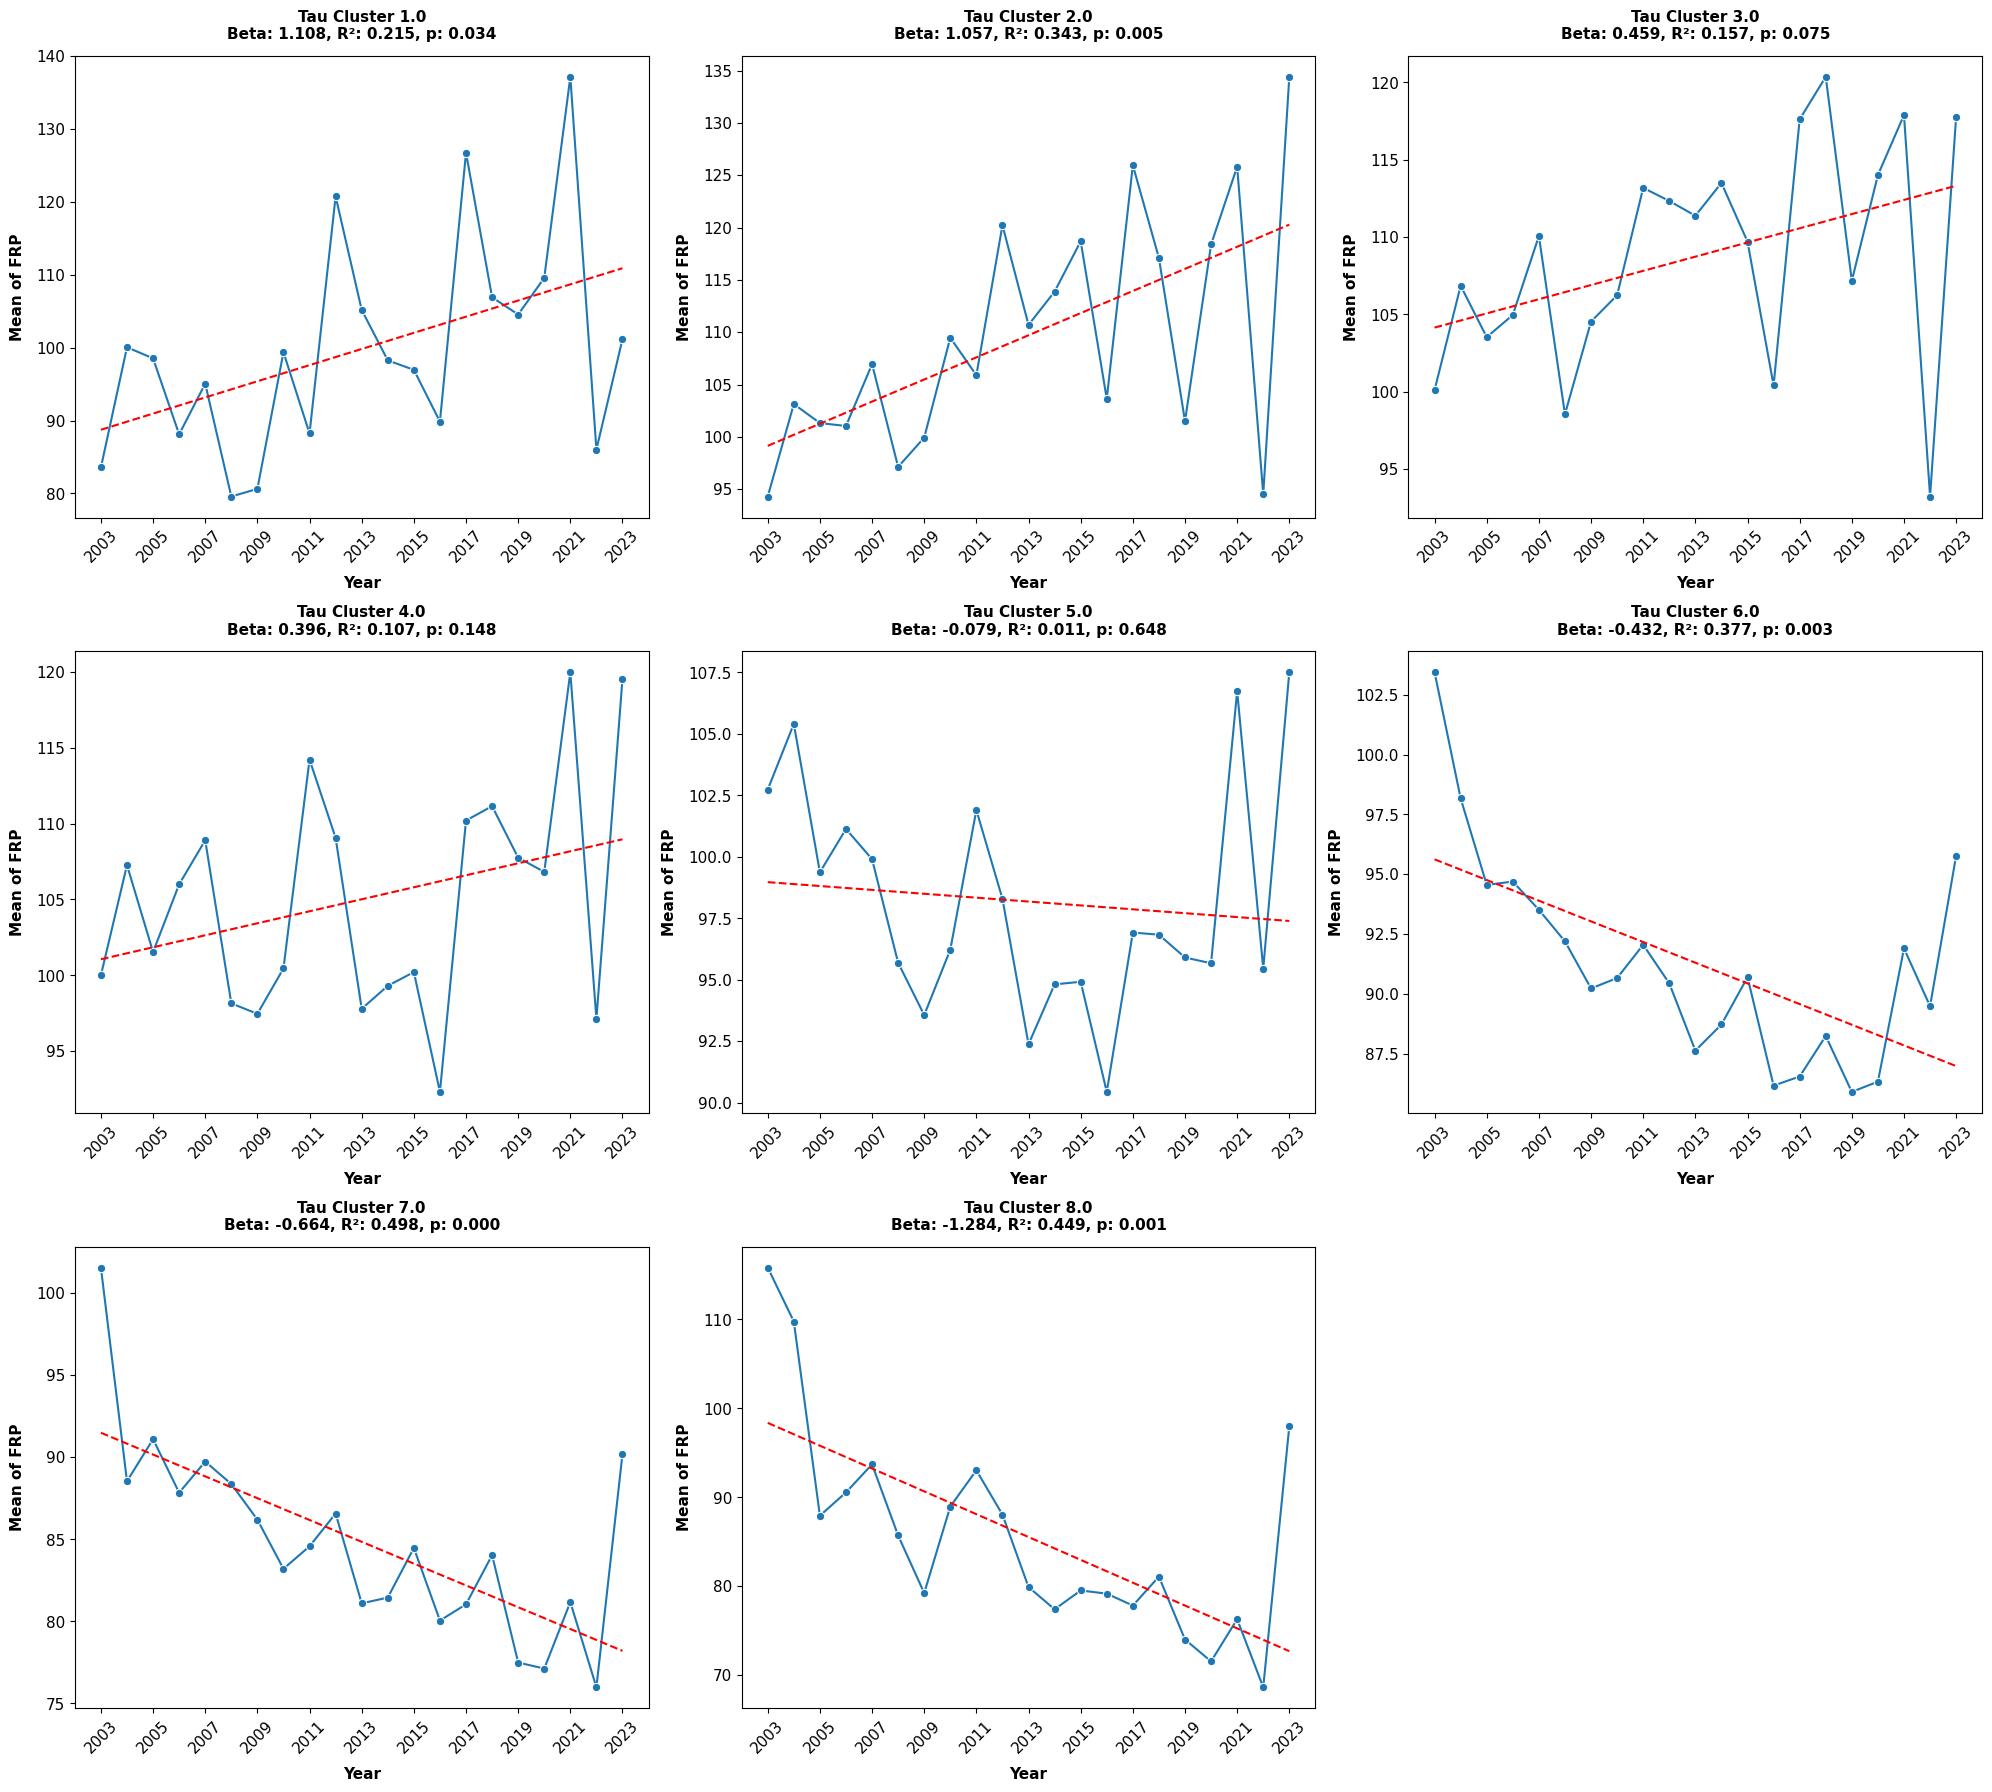

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Convert the 'year' and 'Tau' columns to appropriate types
FRP['year'] = FRP['year'].astype(int)
FRP['Tau'] = FRP['Tau'].astype(float)

# Remove rows where Tau is NaN
FRP = FRP.dropna(subset=['Tau'])

# Get the unique Tau values, excluding Tau = 9
taus = sorted(FRP['Tau'].unique())
taus = [tau for tau in taus if tau != 9.0]  # Remove Tau = 9

# Calculate global y_min and y_max for consistent y-axis limits across all subplots
# global_y_min = FRP['frp'].min() * 0.9  # 10% below the minimum FRP
# global_y_max = FRP['frp'].max() * 1.1  # 10% above the maximum FRP

# Set up the figure for subplots with increased height
plt.figure(figsize=(20, 18))

# Loop over each unique Tau value to create subplots
for i, tau in enumerate(taus, 1):
    # Filter data for each Tau
    tau_data = FRP[FRP['Tau'] == tau]
    
    # # Calculate the 95th percentile for this Tau cluster
    # tau_95th_percentile = tau_data['frp'].quantile(0.95)
    
    # # Filter the data to keep only values below or equal to the 95th percentile
    # tau_data_filtered = tau_data[tau_data['frp'] <= tau_95th_percentile]
    
    # Calculate yearly mean of the filtered FRP data
    yearly_mean_frp = tau_data.groupby('year')['frp'].mean().reset_index()
    
    # Check if there is data available and if no NaN values are present in the columns
    if yearly_mean_frp.empty or yearly_mean_frp['frp'].isnull().all():
        continue  # Skip this Tau cluster if there's no valid data
    
    # Calculate linear regression for the trend line
    slope, intercept, r_value, p_value, std_err = linregress(yearly_mean_frp['year'], yearly_mean_frp['frp'])
    trend_line = intercept + slope * yearly_mean_frp['year']
    
    # Create subplot for each Tau
    plt.subplot((len(taus) + 2) // 3, 3, i)
    sns.lineplot(data=yearly_mean_frp, x='year', y='frp', marker='o')
    plt.plot(yearly_mean_frp['year'], trend_line, 'r--')
    
    # Set x-axis range with padding and ticks for each subplot
    plt.xlim(2002, 2024)  # Slightly extend the range for padding
    plt.xticks(range(2003, 2024, 2), rotation=45, fontsize=11)  # Set every 2 years for readability
    plt.yticks(fontsize=11)  # Increase y-axis tick font size
    
    # Set global y-axis limits for consistency
    plt.ylim()
    
    # Customize each subplot with the Tau cluster number and statistics below the title
    plt.title(f'Tau Cluster {tau}\nBeta: {slope:.3f}, R²: {r_value**2:.3f}, p: {p_value:.3f}', 
              fontsize=11, fontweight='bold', pad=12)
    plt.xlabel('Year', fontsize=11, fontweight='bold', labelpad=8)
    plt.ylabel('Mean of FRP', fontsize=11, fontweight='bold', labelpad=8)
    
    plt.grid(False)

# Adjust layout and add extra padding to prevent labels from getting cut off
plt.tight_layout(pad=1.0)
plt.show()

# Tau Cluster wise yearly SUM FRP Trend [Without 95 percentile] @ Without Grid Wise

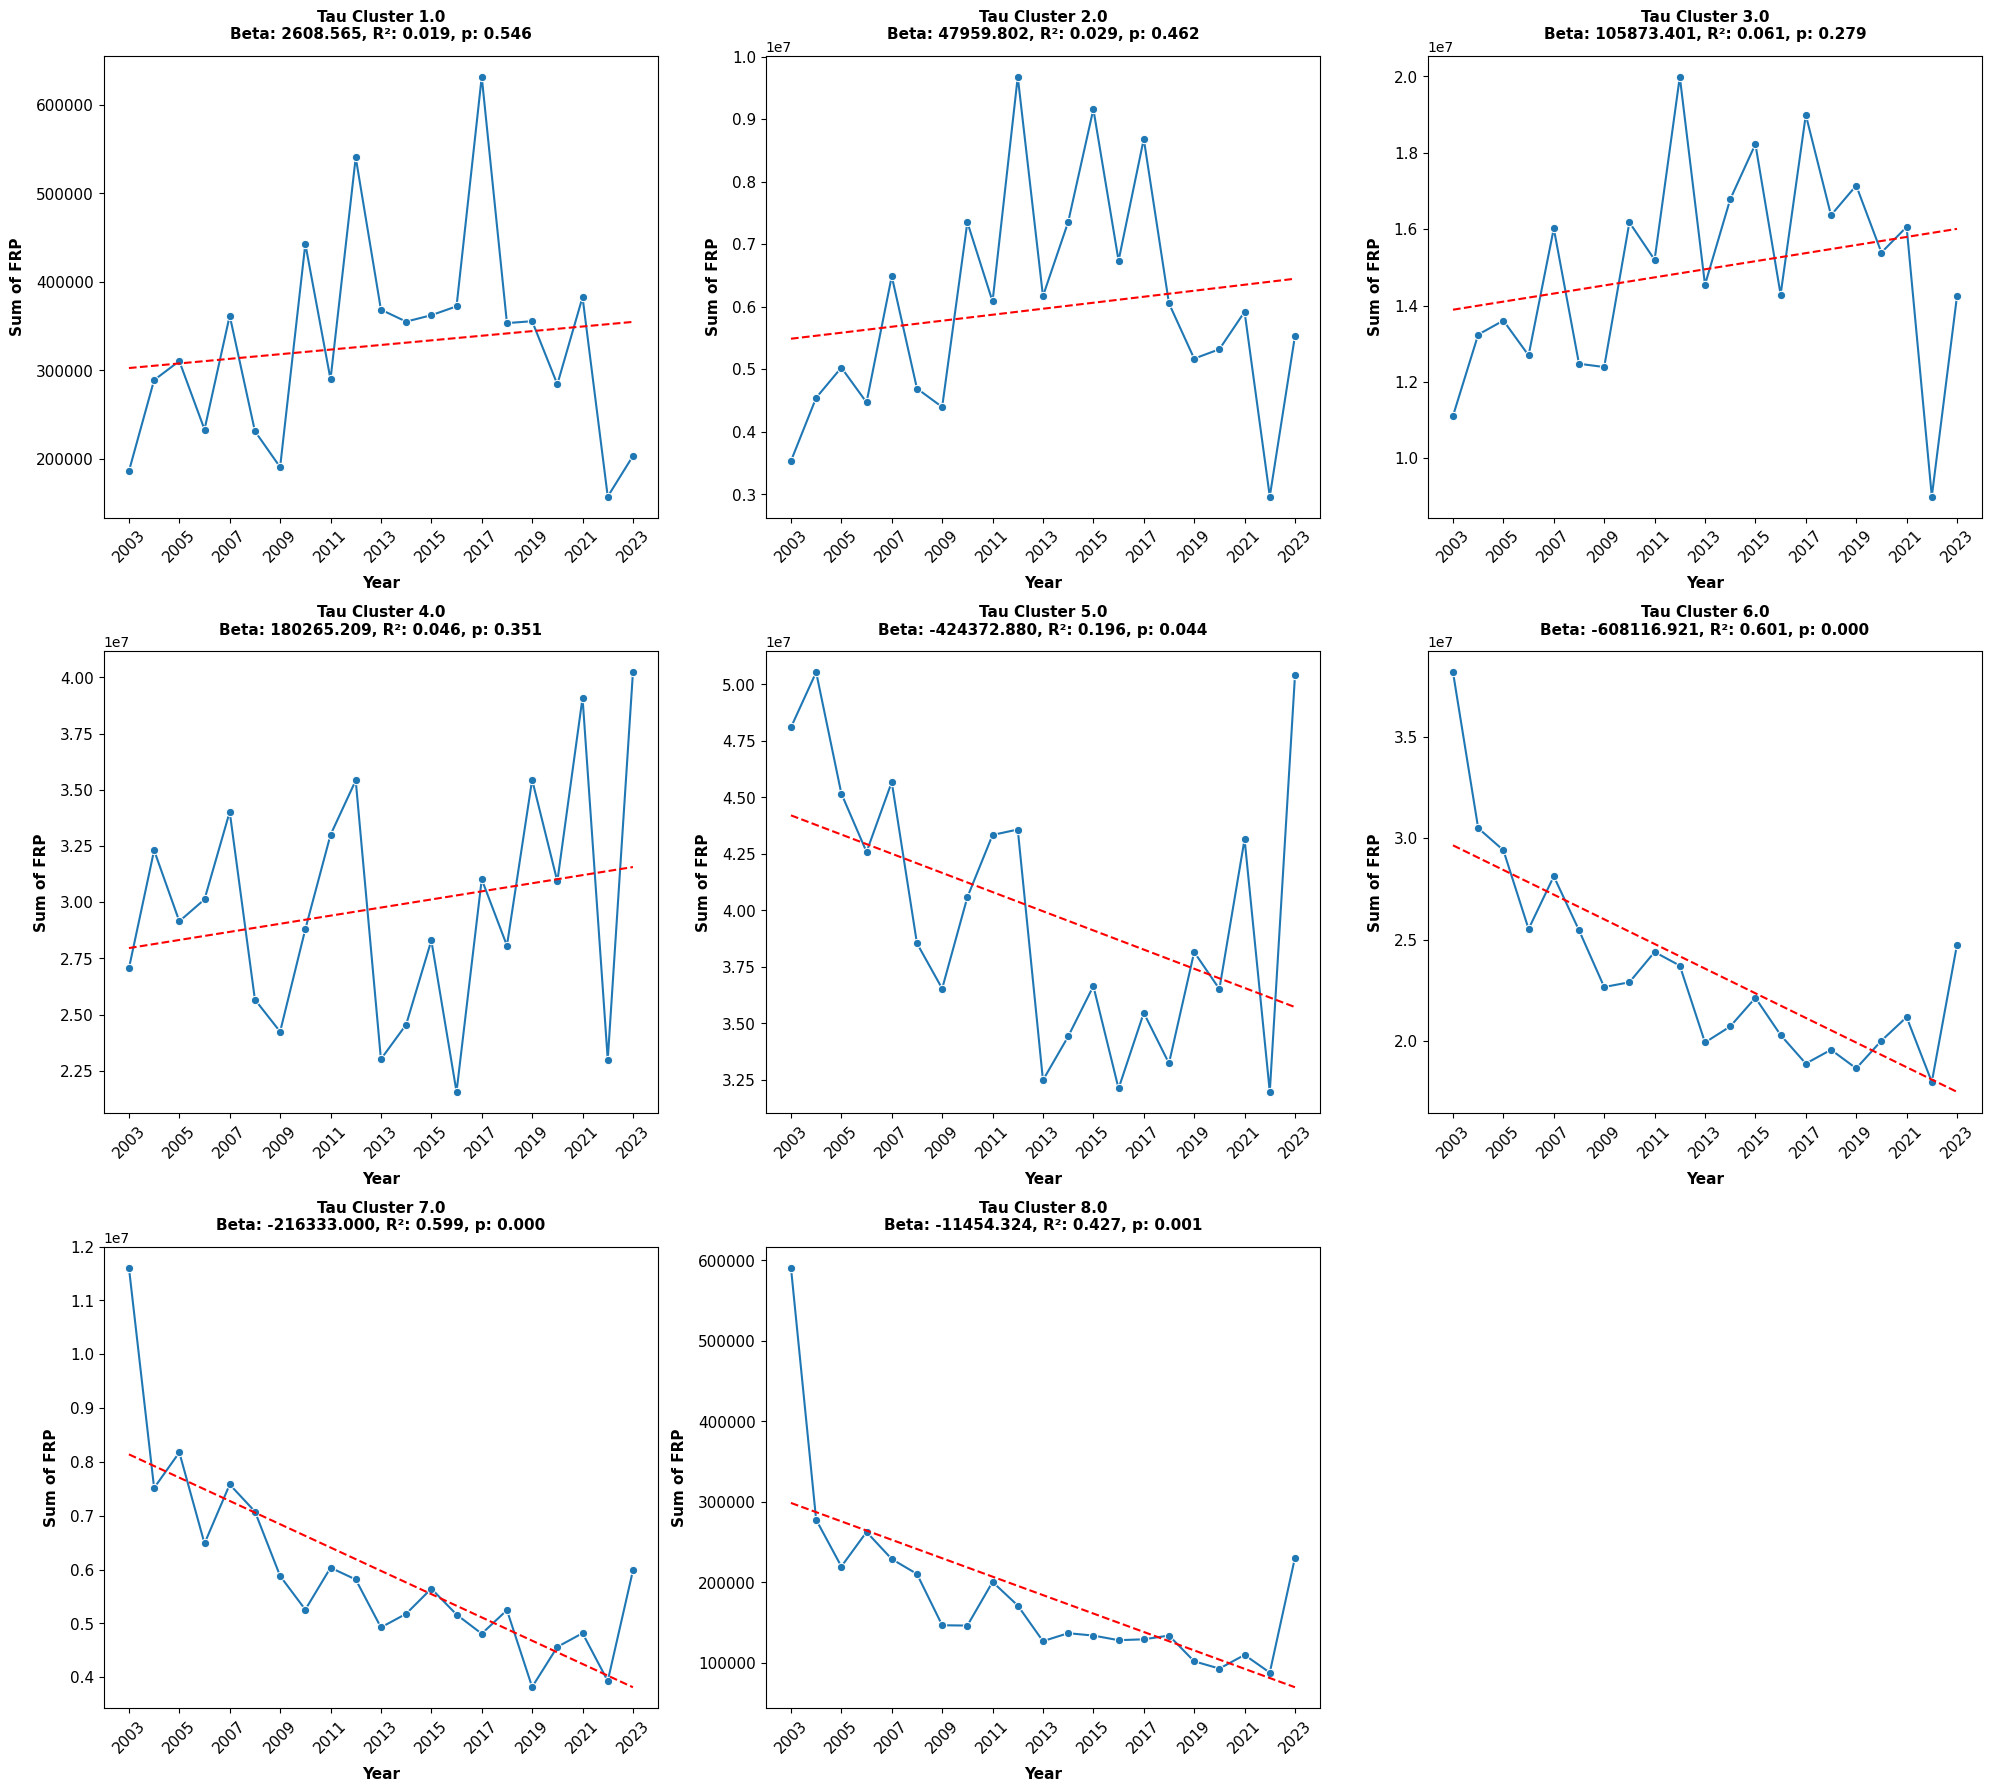

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming FRP data is already loaded as a DataFrame named 'FRP'

# Convert the 'year' and 'Tau' columns to appropriate types
FRP['year'] = FRP['year'].astype(int)
FRP['Tau'] = FRP['Tau'].astype(float)

# Remove rows where Tau is NaN
FRP = FRP.dropna(subset=['Tau'])

# Get the unique Tau values, excluding Tau = 9
taus = sorted(FRP['Tau'].unique())
taus = [tau for tau in taus if tau != 9.0]  # Remove Tau = 9

# Calculate global y_min and y_max for consistent y-axis limits across all subplots
global_y_min = FRP['frp'].min() * 0.9  # 10% below the minimum FRP
global_y_max = FRP['frp'].max() * 1.1  # 10% above the maximum FRP

# Set up the figure for subplots with increased height
plt.figure(figsize=(20, 18))

# Loop over each unique Tau value to create subplots
for i, tau in enumerate(taus, 1):
    # Filter data for each Tau
    tau_data = FRP[FRP['Tau'] == tau]
    
    # # Calculate the 95th percentile for this Tau cluster
    # tau_95th_percentile = tau_data['frp'].quantile(0.95)
    
    # # Filter the data to keep only values below or equal to the 95th percentile
    # tau_data_filtered = tau_data[tau_data['frp'] <= tau_95th_percentile]
    
    # Calculate yearly mean of the filtered FRP data
    yearly_sum_frp = tau_data.groupby('year')['frp'].sum().reset_index()
    
    # Check if there is data available and if no NaN values are present in the columns
    if yearly_sum_frp.empty or yearly_sum_frp['frp'].isnull().all():
        continue  # Skip this Tau cluster if there's no valid data
    
    # Calculate linear regression for the trend line
    slope, intercept, r_value, p_value, std_err = linregress(yearly_sum_frp['year'], yearly_sum_frp['frp'])
    trend_line = intercept + slope * yearly_sum_frp['year']
    
    # Create subplot for each Tau
    plt.subplot((len(taus) + 2) // 3, 3, i)
    sns.lineplot(data=yearly_sum_frp, x='year', y='frp', marker='o')
    plt.plot(yearly_sum_frp['year'], trend_line, 'r--')
    
    # Set x-axis range with padding and ticks for each subplot
    plt.xlim(2002, 2024)  # Slightly extend the range for padding
    plt.xticks(range(2003, 2024, 2), rotation=45, fontsize=11)  # Set every 2 years for readability
    plt.yticks(fontsize=11)  # Increase y-axis tick font size
    
    # Set global y-axis limits for consistency
    plt.ylim()
    
    # Customize each subplot with the Tau cluster number and statistics below the title
    plt.title(f'Tau Cluster {tau}\nBeta: {slope:.3f}, R²: {r_value**2:.3f}, p: {p_value:.3f}', 
              fontsize=11, fontweight='bold', pad=12)
    plt.xlabel('Year', fontsize=11, fontweight='bold', labelpad=8)
    plt.ylabel('Sum of FRP', fontsize=11, fontweight='bold', labelpad=8)
    
    plt.grid(False)

# Adjust layout and add extra padding to prevent labels from getting cut off
plt.tight_layout(pad=1.0)
plt.show()

# Biome Cluster wise yearly SUM FRP Trend [Without 95 percentile] @ Without Grid Wise

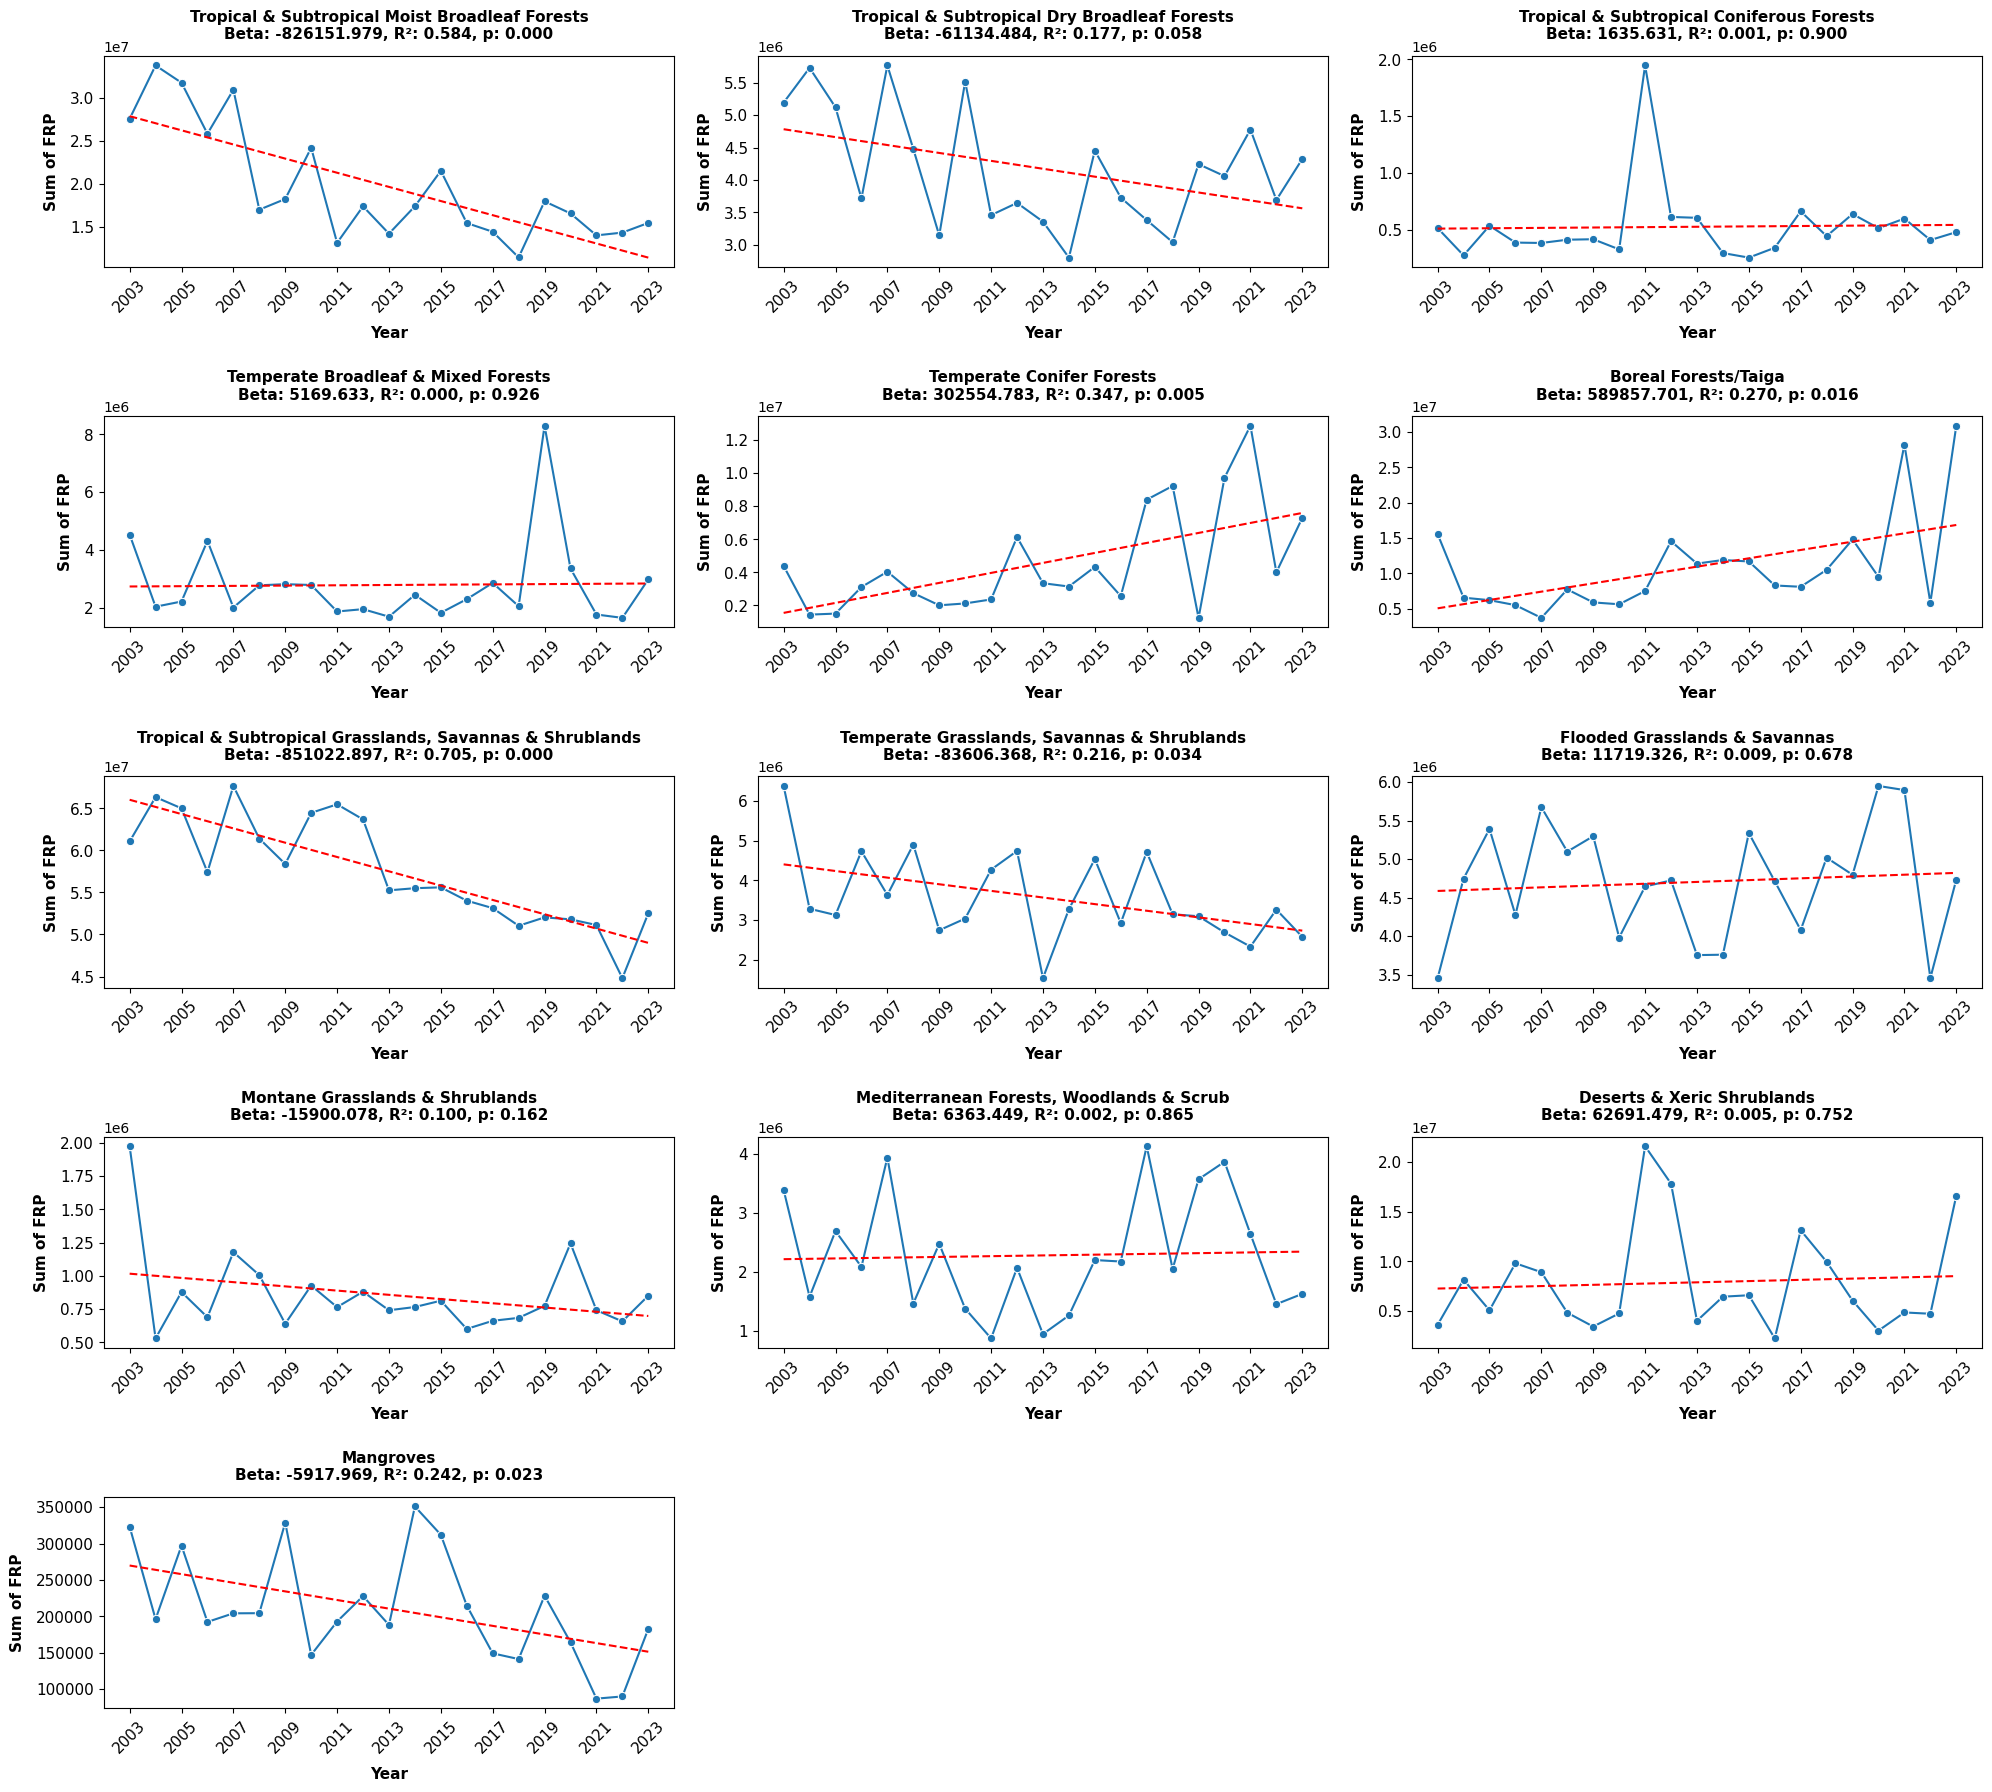

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Biome names based on your mapping (excluding Biome 11)
biome_names = {
    1.0: "Tropical & Subtropical Moist Broadleaf Forests",
    2.0: "Tropical & Subtropical Dry Broadleaf Forests",
    3.0: "Tropical & Subtropical Coniferous Forests",
    4.0: "Temperate Broadleaf & Mixed Forests",
    5.0: "Temperate Conifer Forests",
    6.0: "Boreal Forests/Taiga",
    7.0: "Tropical & Subtropical Grasslands, Savannas & Shrublands",
    8.0: "Temperate Grasslands, Savannas & Shrublands",
    9.0: "Flooded Grasslands & Savannas",
    10.0: "Montane Grasslands & Shrublands",
    12.0: "Mediterranean Forests, Woodlands & Scrub",
    13.0: "Deserts & Xeric Shrublands",
    14.0: "Mangroves"
}

# Convert the 'year' and 'Biome' columns to appropriate types
FRP['year'] = FRP['year'].astype(int)
FRP['Biome'] = FRP['Biome'].astype(float)

# Remove rows where Biome is NaN or Biome is 11
FRP = FRP.dropna(subset=['Biome'])
FRP = FRP[FRP['Biome'] != 11.0]  # Exclude Biome 11

# Get the unique Biome values
biomes = sorted(FRP['Biome'].unique())

# Calculate global y_min and y_max for consistent y-axis limits across all subplots
global_y_min = FRP['frp'].min() * 0.9  # 10% below the minimum FRP
global_y_max = FRP['frp'].max() * 1.1  # 10% above the maximum FRP

# Set up the figure for subplots with increased height
plt.figure(figsize=(20, 18))

# Loop over each unique Biome value to create subplots
for i, biome in enumerate(biomes, 1):
    # Filter data for each Biome
    biome_data = FRP[FRP['Biome'] == biome]
    
    # # Calculate the 95th percentile for this Biome cluster
    # biome_95th_percentile = biome_data['frp'].quantile(0.95)
    
    # # Filter the data to keep only values below or equal to the 95th percentile
    # biome_data_filtered = biome_data[biome_data['frp'] <= biome_95th_percentile]
    
    # Calculate yearly sum of the filtered FRP data
    yearly_sum_frp = biome_data.groupby('year')['frp'].sum().reset_index()
    
    # Check if there is data available and if no NaN values are present in the columns
    if yearly_sum_frp.empty or yearly_sum_frp['frp'].isnull().all():
        continue  # Skip this Biome cluster if there's no valid data
    
    # Calculate linear regression for the trend line
    slope, intercept, r_value, p_value, std_err = linregress(yearly_sum_frp['year'], yearly_sum_frp['frp'])
    trend_line = intercept + slope * yearly_sum_frp['year']
    
    # Create subplot for each Biome
    plt.subplot((len(biomes) + 2) // 3, 3, i)
    sns.lineplot(data=yearly_sum_frp, x='year', y='frp', marker='o')
    plt.plot(yearly_sum_frp['year'], trend_line, 'r--')
    
    # Set x-axis range with padding and ticks for each subplot
    plt.xlim(2002, 2024)  # Slightly extend the range for padding
    plt.xticks(range(2003, 2024, 2), rotation=45, fontsize=11)  # Set every 2 years for readability
    plt.yticks(fontsize=11)  # Increase y-axis tick font size
    
    # Set global y-axis limits for consistency
    plt.ylim()
    
    # Customize each subplot with the biome name and statistics below the title
    biome_name = biome_names.get(biome, f"Biome {biome}")
    plt.title(f'{biome_name}\nBeta: {slope:.3f}, R²: {r_value**2:.3f}, p: {p_value:.3f}', 
              fontsize=11, fontweight='bold', pad=12)
    plt.xlabel('Year', fontsize=11, fontweight='bold', labelpad=8)
    plt.ylabel('Sum of FRP', fontsize=11, fontweight='bold', labelpad=8)
    
    plt.grid(False)

# Adjust layout and add extra padding to prevent labels from getting cut off
plt.tight_layout(pad=1.0)
plt.show()

# Biome Cluster wise yearly MEAN FRP Trend [Without 95 percentile] @ Without Grid Wise

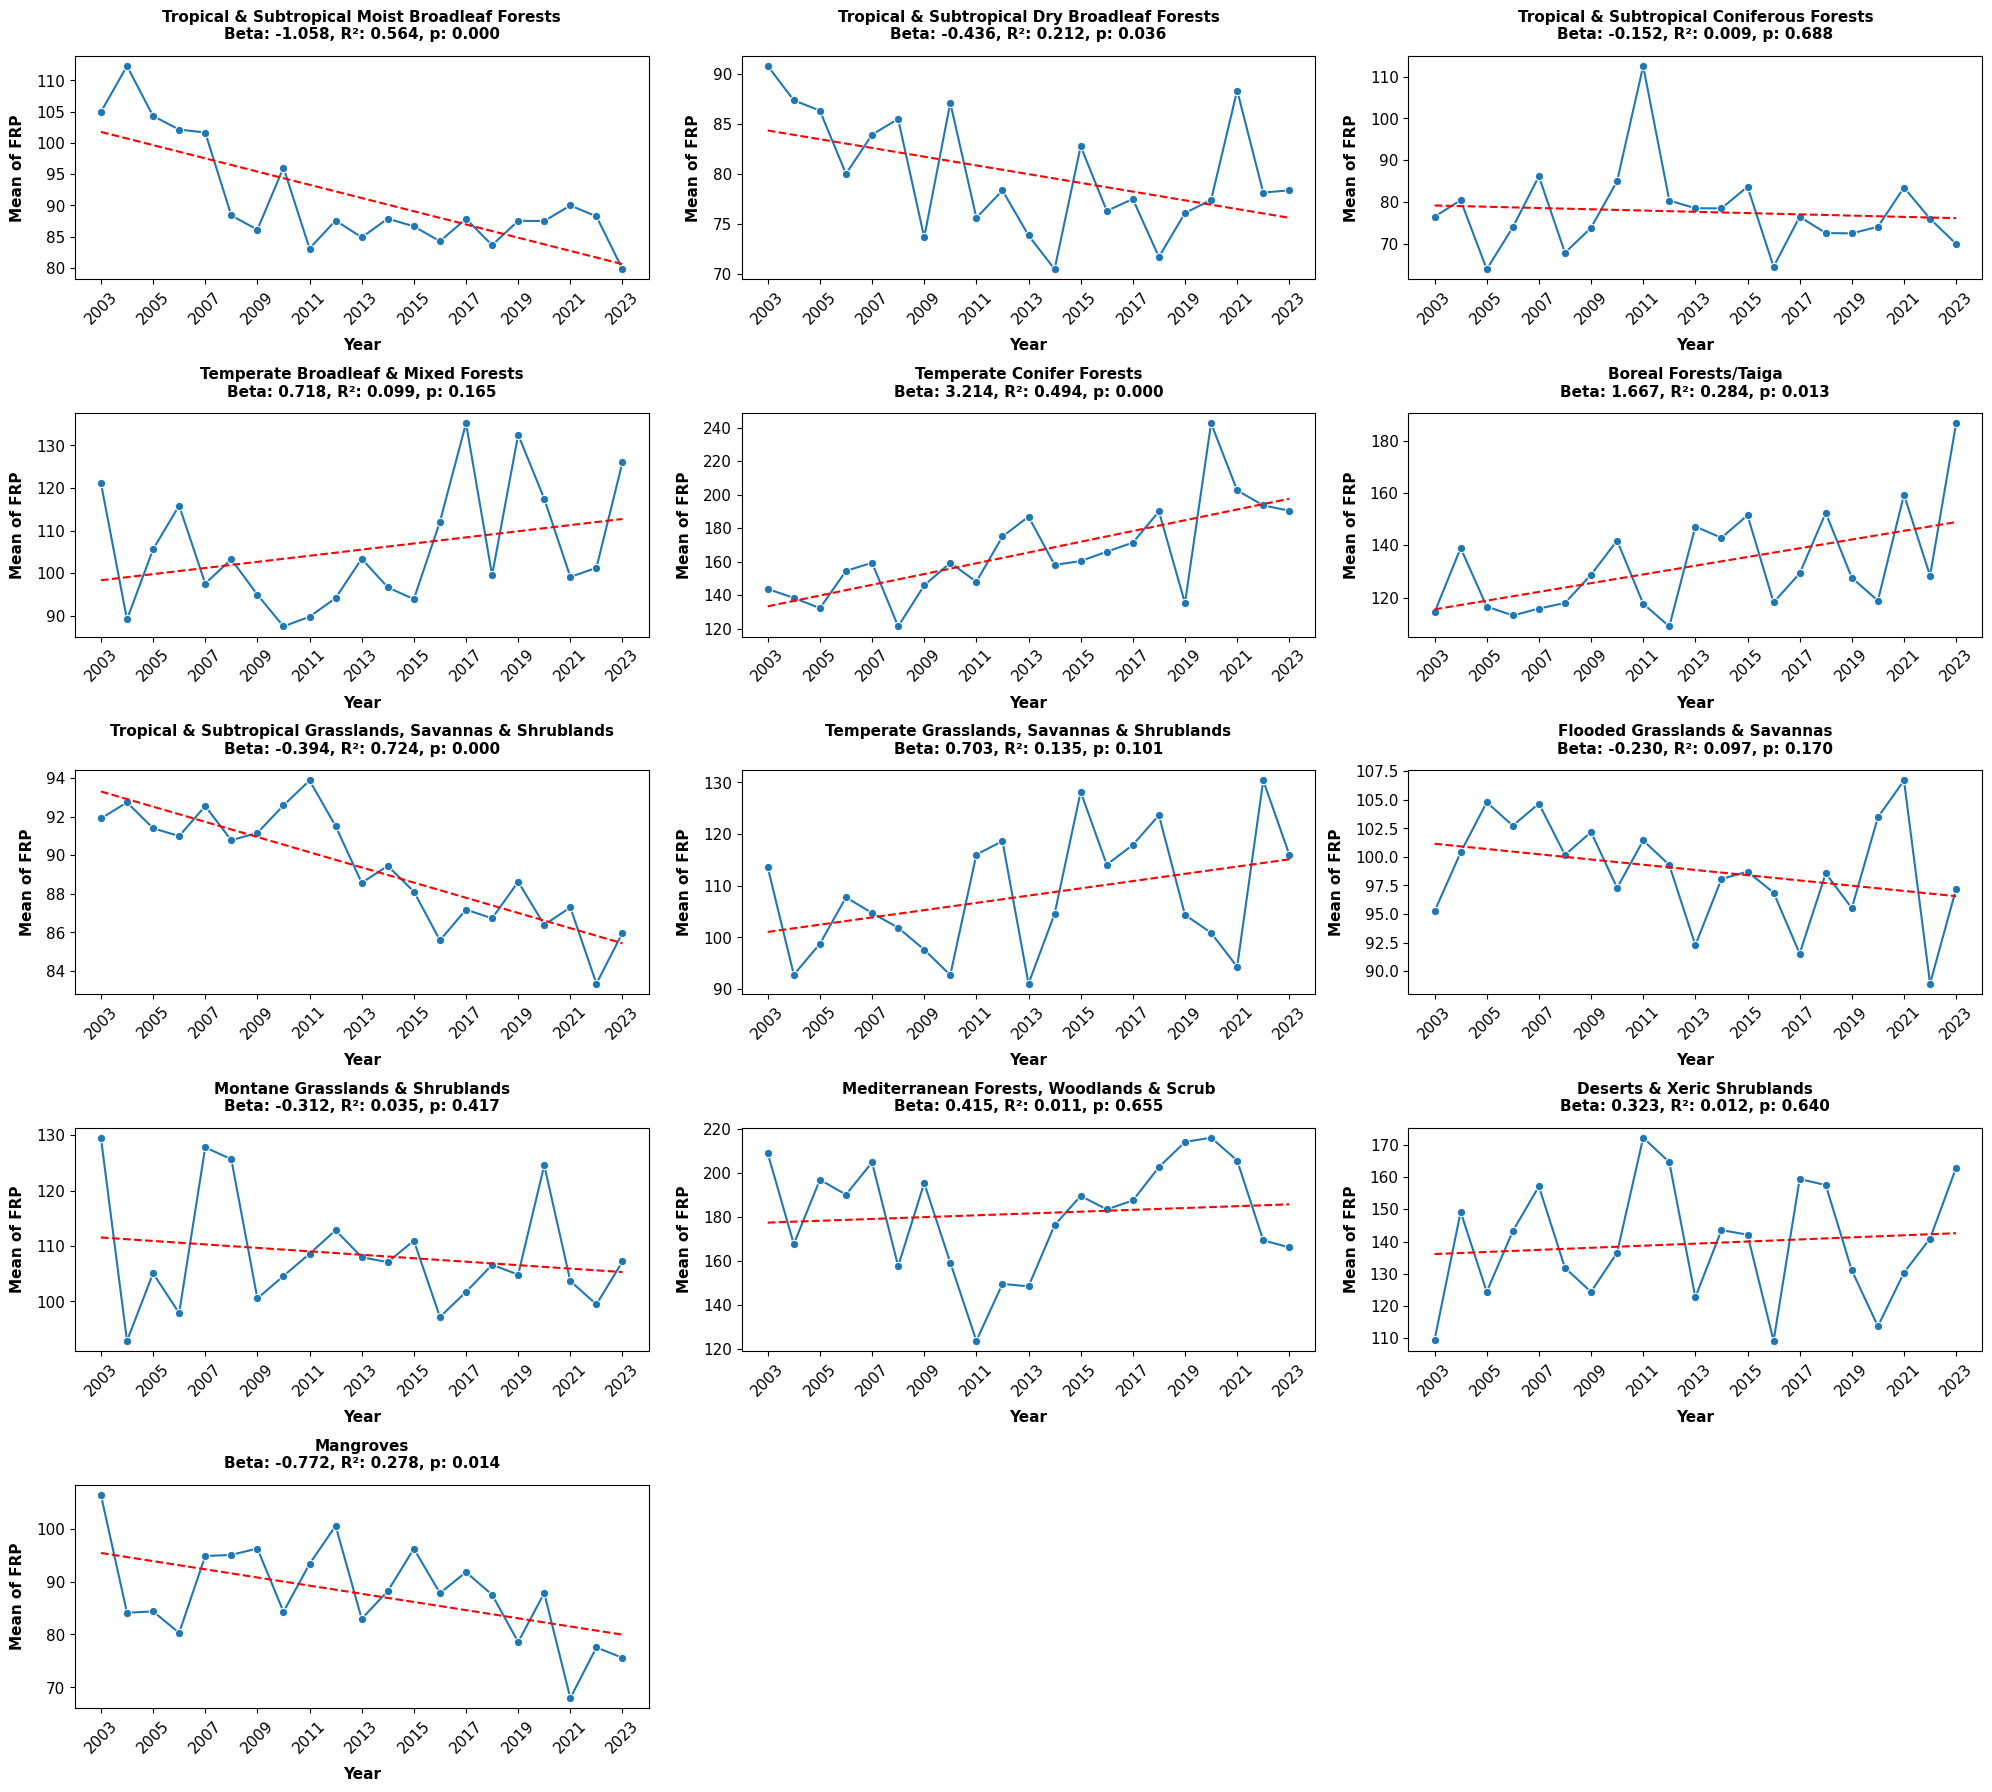

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming FRP data is already loaded as a DataFrame named 'FRP'

# Biome names based on your mapping (excluding Biome 11)
biome_names = {
    1.0: "Tropical & Subtropical Moist Broadleaf Forests",
    2.0: "Tropical & Subtropical Dry Broadleaf Forests",
    3.0: "Tropical & Subtropical Coniferous Forests",
    4.0: "Temperate Broadleaf & Mixed Forests",
    5.0: "Temperate Conifer Forests",
    6.0: "Boreal Forests/Taiga",
    7.0: "Tropical & Subtropical Grasslands, Savannas & Shrublands",
    8.0: "Temperate Grasslands, Savannas & Shrublands",
    9.0: "Flooded Grasslands & Savannas",
    10.0: "Montane Grasslands & Shrublands",
    12.0: "Mediterranean Forests, Woodlands & Scrub",
    13.0: "Deserts & Xeric Shrublands",
    14.0: "Mangroves"
}

# Convert the 'year' and 'Biome' columns to appropriate types
FRP['year'] = FRP['year'].astype(int)
FRP['Biome'] = FRP['Biome'].astype(float)

# Remove rows where Biome is NaN or Biome is 11
FRP = FRP.dropna(subset=['Biome'])
FRP = FRP[FRP['Biome'] != 11.0]  # Exclude Biome 11

# Get the unique Biome values
biomes = sorted(FRP['Biome'].unique())

# Calculate global y_min and y_max for consistent y-axis limits across all subplots
global_y_min = FRP['frp'].min() * 0.9  # 10% below the minimum FRP
global_y_max = FRP['frp'].max() * 1.1  # 10% above the maximum FRP

# Set up the figure for subplots with increased height
plt.figure(figsize=(20, 18))

# Loop over each unique Biome value to create subplots
for i, biome in enumerate(biomes, 1):
    # Filter data for each Biome
    biome_data = FRP[FRP['Biome'] == biome]
    
    # # Calculate the 95th percentile for this Biome cluster
    # biome_95th_percentile = biome_data['frp'].quantile(0.95)
    
    # # Filter the data to keep only values below or equal to the 95th percentile
    # biome_data_filtered = biome_data[biome_data['frp'] <= biome_95th_percentile]
    
    # Calculate yearly sum of the filtered FRP data
    yearly_mean_frp = biome_data.groupby('year')['frp'].mean().reset_index()
    
    # Check if there is data available and if no NaN values are present in the columns
    if yearly_mean_frp.empty or yearly_mean_frp['frp'].isnull().all():
        continue  # Skip this Biome cluster if there's no valid data
    
    # Calculate linear regression for the trend line
    slope, intercept, r_value, p_value, std_err = linregress(yearly_mean_frp['year'], yearly_mean_frp['frp'])
    trend_line = intercept + slope * yearly_mean_frp['year']
    
    # Create subplot for each Biome
    plt.subplot((len(biomes) + 2) // 3, 3, i)
    sns.lineplot(data=yearly_mean_frp, x='year', y='frp', marker='o')
    plt.plot(yearly_mean_frp['year'], trend_line, 'r--')
    
    # Set x-axis range with padding and ticks for each subplot
    plt.xlim(2002, 2024)  # Slightly extend the range for padding
    plt.xticks(range(2003, 2024, 2), rotation=45, fontsize=11)  # Set every 2 years for readability
    plt.yticks(fontsize=11)  # Increase y-axis tick font size
    
    # Set global y-axis limits for consistency
    plt.ylim()
    
    # Customize each subplot with the biome name and statistics below the title
    biome_name = biome_names.get(biome, f"Biome {biome}")
    plt.title(f'{biome_name}\nBeta: {slope:.3f}, R²: {r_value**2:.3f}, p: {p_value:.3f}', 
              fontsize=11, fontweight='bold', pad=12)
    plt.xlabel('Year', fontsize=11, fontweight='bold', labelpad=8)
    plt.ylabel('Mean of FRP', fontsize=11, fontweight='bold', labelpad=8)
    
    plt.grid(False)

# Adjust layout and add extra padding to prevent labels from getting cut off
plt.tight_layout(pad=1.0)
plt.show()

# FRP GLOBAL ANALYSIS
# FRP GRID WISE @ WITHOUT PERCENTILE

In [ ]:
# import geopandas as gpd
# import pandas as pd
# import numpy as np

# # Load the point shapefile and grid shapefile
# points_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/Final_FRP_filtered_New.shp")
# grid_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/1D_Grid_globe.shp")

# # Ensure both shapefiles have the same CRS
# points_gdf = points_gdf.to_crs(epsg=4326)
# grid_gdf = grid_gdf.to_crs(epsg=4326)

# # Fix invalid geometries if present
# grid_gdf = grid_gdf[grid_gdf.is_valid]
# points_gdf = points_gdf[points_gdf.is_valid]

# # Perform spatial join
# joined_gdf = gpd.sjoin(grid_gdf, points_gdf, how="inner", predicate="intersects")

# # Calculate the 95th percentile of FRP for each grid cell, year, Tau, and Biome class
# percentile_values = (
#     joined_gdf.groupby(["id", "year", "Tau", "Biome"])
#     .agg(percentile_95_frp=("frp", lambda x: np.percentile(x.dropna(), 95)))
#     .reset_index()
# )

# # Merge percentile values back to the main data
# joined_gdf = joined_gdf.merge(percentile_values, on=["id", "year", "Tau", "Biome"], how="left")

# # Filter for points with FRP above the 95th percentile within each grid cell, year, Tau, and Biome class
# filtered_points = joined_gdf[joined_gdf["frp"] >= joined_gdf["percentile_95_frp"]]



# # Save the result to a new shapefile (with yearly, Tau, and Biome data)
# #.to_file("/Users/ceedindia/Documents/Research/Filtered_Grid_Sum_FRP_Above_95th_Percentile_Tau_Biome_Yearly.shp")

# # Optional: Plot trends for a specific Tau and Biome class, e.g., Tau class 1 and Biome class 2
# # import matplotlib.pyplot as plt

# # Filter for a specific Tau and Biome class (e.g., Tau class 1 and Biome class 2)


In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

# Load the point shapefile and grid shapefile
points_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/Final_FRP_filtered_New.shp")
grid_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/1D_Grid_globe.shp")

# Ensure both shapefiles have the same CRS
points_gdf = points_gdf.to_crs(epsg=4326)
grid_gdf = grid_gdf.to_crs(epsg=4326)

# Fix invalid geometries if present
grid_gdf = grid_gdf[grid_gdf.is_valid]
points_gdf = points_gdf[points_gdf.is_valid]

# Perform spatial join
joined_gdf = gpd.sjoin(grid_gdf, points_gdf, how="inner", predicate="intersects")

# Calculate the sum and mean of FRP for each grid cell, year, Tau, and Biome class
frp_stats = (
    joined_gdf.groupby(["id", "year", "Tau", "Biome"])
    .agg(sum_frp=("frp", "sum"), mean_frp=("frp", "mean"))
    .reset_index()
)

# Merge FRP statistics back to the main data
joined_gdf = joined_gdf.merge(frp_stats, on=["id", "year", "Tau", "Biome"], how="left")

# Save the result to a new shapefile (with yearly, Tau, and Biome data)
# joined_gdf.to_file("/Users/ceedindia/Documents/Research/Filtered_Grid_Sum_Mean_FRP_Tau_Biome_Yearly.shp")

# Optional: Plot trends for a specific Tau and Biome class, e.g., Tau class 1 and Biome class 2
# import matplotlib.pyplot as plt

# # Filter for a specific Tau and Biome class (e.g., Tau class 1 and Biome class 2)
# specific_tau_biome = joined_gdf[(joined_gdf["Tau"] == 1) & (joined_gdf["Biome"] == 2)]
# yearly_trends = specific_tau_biome.groupby("year")["sum_frp"].sum().reset_index()

# plt.figure(figsize=(10, 6))
# plt.plot(yearly_trends["year"], yearly_trends["sum_frp"], marker='o')
# plt.title("Yearly Sum of FRP for Tau Class 1 and Biome Class 2")
# plt.xlabel("Year")
# plt.ylabel("Sum FRP")
# plt.grid(True)
# plt.show()
# joined_gdf

id        left        top       right     bottom  row_index  \
0           792.0 -175.999989 -19.376875 -174.999989 -20.376875      103.0   
1           792.0 -175.999989 -19.376875 -174.999989 -20.376875      103.0   
2           792.0 -175.999989 -19.376875 -174.999989 -20.376875      103.0   
3           792.0 -175.999989 -19.376875 -174.999989 -20.376875      103.0   
4           792.0 -175.999989 -19.376875 -174.999989 -20.376875      103.0   
...           ...         ...        ...         ...        ...        ...   
25422339  61849.0  179.000011 -16.376875  180.000011 -17.376875      100.0   
25422340  61850.0  179.000011 -17.376875  180.000011 -18.376875      101.0   
25422341  61850.0  179.000011 -17.376875  180.000011 -18.376875      101.0   
25422342  61850.0  179.000011 -17.376875  180.000011 -18.376875      101.0   
25422343  61850.0  179.000011 -17.376875  180.000011 -18.376875      101.0   

          col_index                                           geometry  \
0               4.0  POLYGON ((-175.99999 -19.37687, -174.99999 -19...   
1               4.0  POLYGON ((-175.99999 -19.37687, -174.99999 -19...   
2               4.0  POLYGON ((-175.99999 -19.37687, -174.99999 -19...   
3               4.0  POLYGON ((-175.99999 -19.37687, -174.99999 -19...   
4               4.0  POLYGON ((-175.99999 -19.37687, -174.99999 -19...   
...             ...                                                ...   
25422339      359.0  POLYGON ((179.00001 -16.37687, 180.00001 -16.3...   
25422340      359.0  POLYGON ((179.00001 -17.37687, 180.00001 -17.3...   
25422341      359.0  POLYGON ((179.00001 -17.37687, 180.00001 -17.3...   
25422342      359.0  POLYGON ((179.00001 -17.37687, 180.00001 -17.3...   
25422343      359.0  POLYGON ((179.00001 -17.37687, 180.00001 -17.3...   

          index_right  latitude  ...   frp  daynight  type  Unnamed_ 0  year  \
0            22007050  -19.7345  ...  20.1         N   1.0         NaN  2021   
1            22007053  -19.7321  ...  15.5         N   1.0         NaN  2021   
2            22007048  -19.7262  ...   0.0         N   1.0         NaN  2021   
3            22007054  -19.7259  ...  24.7         N   1.0         NaN  2021   
4            22007052  -19.7257  ...  14.8         N   1.0         NaN  2021   
...               ...       ...  ...   ...       ...   ...         ...   ...   
25422339     14651499  -16.3793  ...  32.4         D   0.0         NaN  2014   
25422340       742029  -18.0808  ...  46.3         D   0.0         NaN  2003   
25422341     16413915  -17.9764  ...  16.1         N   0.0         NaN  2016   
25422342     16413916  -17.9728  ...  11.3         N   0.0         NaN  2016   
25422343      4491338  -17.9713  ...  33.1         D   0.0         NaN  2006   

          LULC_Class Biome Tau  sum_frp  mean_frp  
0                1.0   1.0 NaN      NaN       NaN  
1                1.0   1.0 NaN      NaN       NaN  
2                1.0   1.0 NaN      NaN       NaN  
3                1.0   1.0 NaN      NaN       NaN  
4                1.0   1.0 NaN      NaN       NaN  
...              ...   ...  ..      ...       ...  
25422339         1.0   2.0 NaN      NaN       NaN  
25422340         1.0   1.0 NaN      NaN       NaN  
25422341         1.0   NaN NaN      NaN       NaN  
25422342         1.0   1.0 NaN      NaN       NaN  
25422343         1.0   1.0 NaN      NaN       NaN  

[25422344 rows x 31 columns]

# SUM ANALYSIS

In [ ]:
# # Calculate the sum of FRP above the 95th percentile for each grid cell, year, Tau, and Biome class
# sum_values = (
#     filtered_points.groupby(["id", "year", "Tau", "Biome"])
#     .agg(sum_frp_above_95=("frp", "sum"))
#     .reset_index()
# )

# # Merge yearly FRP sums by Tau and Biome class back to grid shapefile
# FRP = grid_gdf.merge(sum_values, on="id", how="left")

# # Filter out grid cells with NaN values in 'sum_frp_above_95'
# FRP = joined_gdf.dropna(subset=["Biome"])
# FRP

In [3]:
FRP = joined_gdf.dropna(subset=["mean_frp"])
FRP

id        left        top       right     bottom  row_index  \
22         2252.0 -166.999989  68.623125 -165.999989  67.623125       15.0   
23         2252.0 -166.999989  68.623125 -165.999989  67.623125       15.0   
24         2252.0 -166.999989  68.623125 -165.999989  67.623125       15.0   
25         2252.0 -166.999989  68.623125 -165.999989  67.623125       15.0   
26         2430.0 -165.999989  62.623125 -164.999989  61.623125       21.0   
...           ...         ...        ...         ...        ...        ...   
25422030  61595.0  178.000011  65.623125  179.000011  64.623125       18.0   
25422031  61595.0  178.000011  65.623125  179.000011  64.623125       18.0   
25422032  61595.0  178.000011  65.623125  179.000011  64.623125       18.0   
25422033  61595.0  178.000011  65.623125  179.000011  64.623125       18.0   
25422034  61595.0  178.000011  65.623125  179.000011  64.623125       18.0   

          col_index                                           geometry  \
22             13.0  POLYGON ((-166.99999 68.62313, -165.99999 68.6...   
23             13.0  POLYGON ((-166.99999 68.62313, -165.99999 68.6...   
24             13.0  POLYGON ((-166.99999 68.62313, -165.99999 68.6...   
25             13.0  POLYGON ((-166.99999 68.62313, -165.99999 68.6...   
26             14.0  POLYGON ((-165.99999 62.62313, -164.99999 62.6...   
...             ...                                                ...   
25422030      358.0  POLYGON ((178.00001 65.62313, 179.00001 65.623...   
25422031      358.0  POLYGON ((178.00001 65.62313, 179.00001 65.623...   
25422032      358.0  POLYGON ((178.00001 65.62313, 179.00001 65.623...   
25422033      358.0  POLYGON ((178.00001 65.62313, 179.00001 65.623...   
25422034      358.0  POLYGON ((178.00001 65.62313, 179.00001 65.623...   

          index_right  latitude  ...    frp  daynight  type  Unnamed_ 0  year  \
22           18768918   68.3035  ...   49.8         D   0.0         NaN  2018   
23           18768635   68.3348  ...   24.1         D   0.0         NaN  2018   
24           18768634   68.3405  ...   92.3         D   0.0         NaN  2018   
25           18768640   68.3411  ...  114.2         D   0.0         NaN  2018   
26           22553089   61.7694  ...   35.9         N   0.0         NaN  2021   
...               ...       ...  ...    ...       ...   ...         ...   ...   
25422030      7287879   65.1993  ...   29.8         D   0.0         NaN  2008   
25422031      7287877   65.2033  ...   18.7         D   0.0         NaN  2008   
25422032      7287876   65.2067  ...   35.2         D   0.0         NaN  2008   
25422033      7287767   65.2084  ...   34.7         D   0.0         NaN  2008   
25422034      7287662   65.2161  ...   94.9         D   0.0         NaN  2008   

          LULC_Class Biome  Tau  sum_frp    mean_frp  
22               1.0  11.0  4.0    280.4   70.100000  
23               1.0  11.0  4.0    280.4   70.100000  
24               1.0  11.0  4.0    280.4   70.100000  
25               1.0  11.0  4.0    280.4   70.100000  
26               1.0  11.0  6.0    275.5  137.750000  
...              ...   ...  ...      ...         ...  
25422030         1.0  11.0  5.0   4215.8  113.940541  
25422031         1.0  11.0  6.0   1310.4  109.200000  
25422032         1.0  11.0  6.0   1310.4  109.200000  
25422033         1.0  11.0  6.0   1310.4  109.200000  
25422034         1.0  11.0  6.0   1310.4  109.200000  

[25391500 rows x 31 columns]

# BIOME SUM

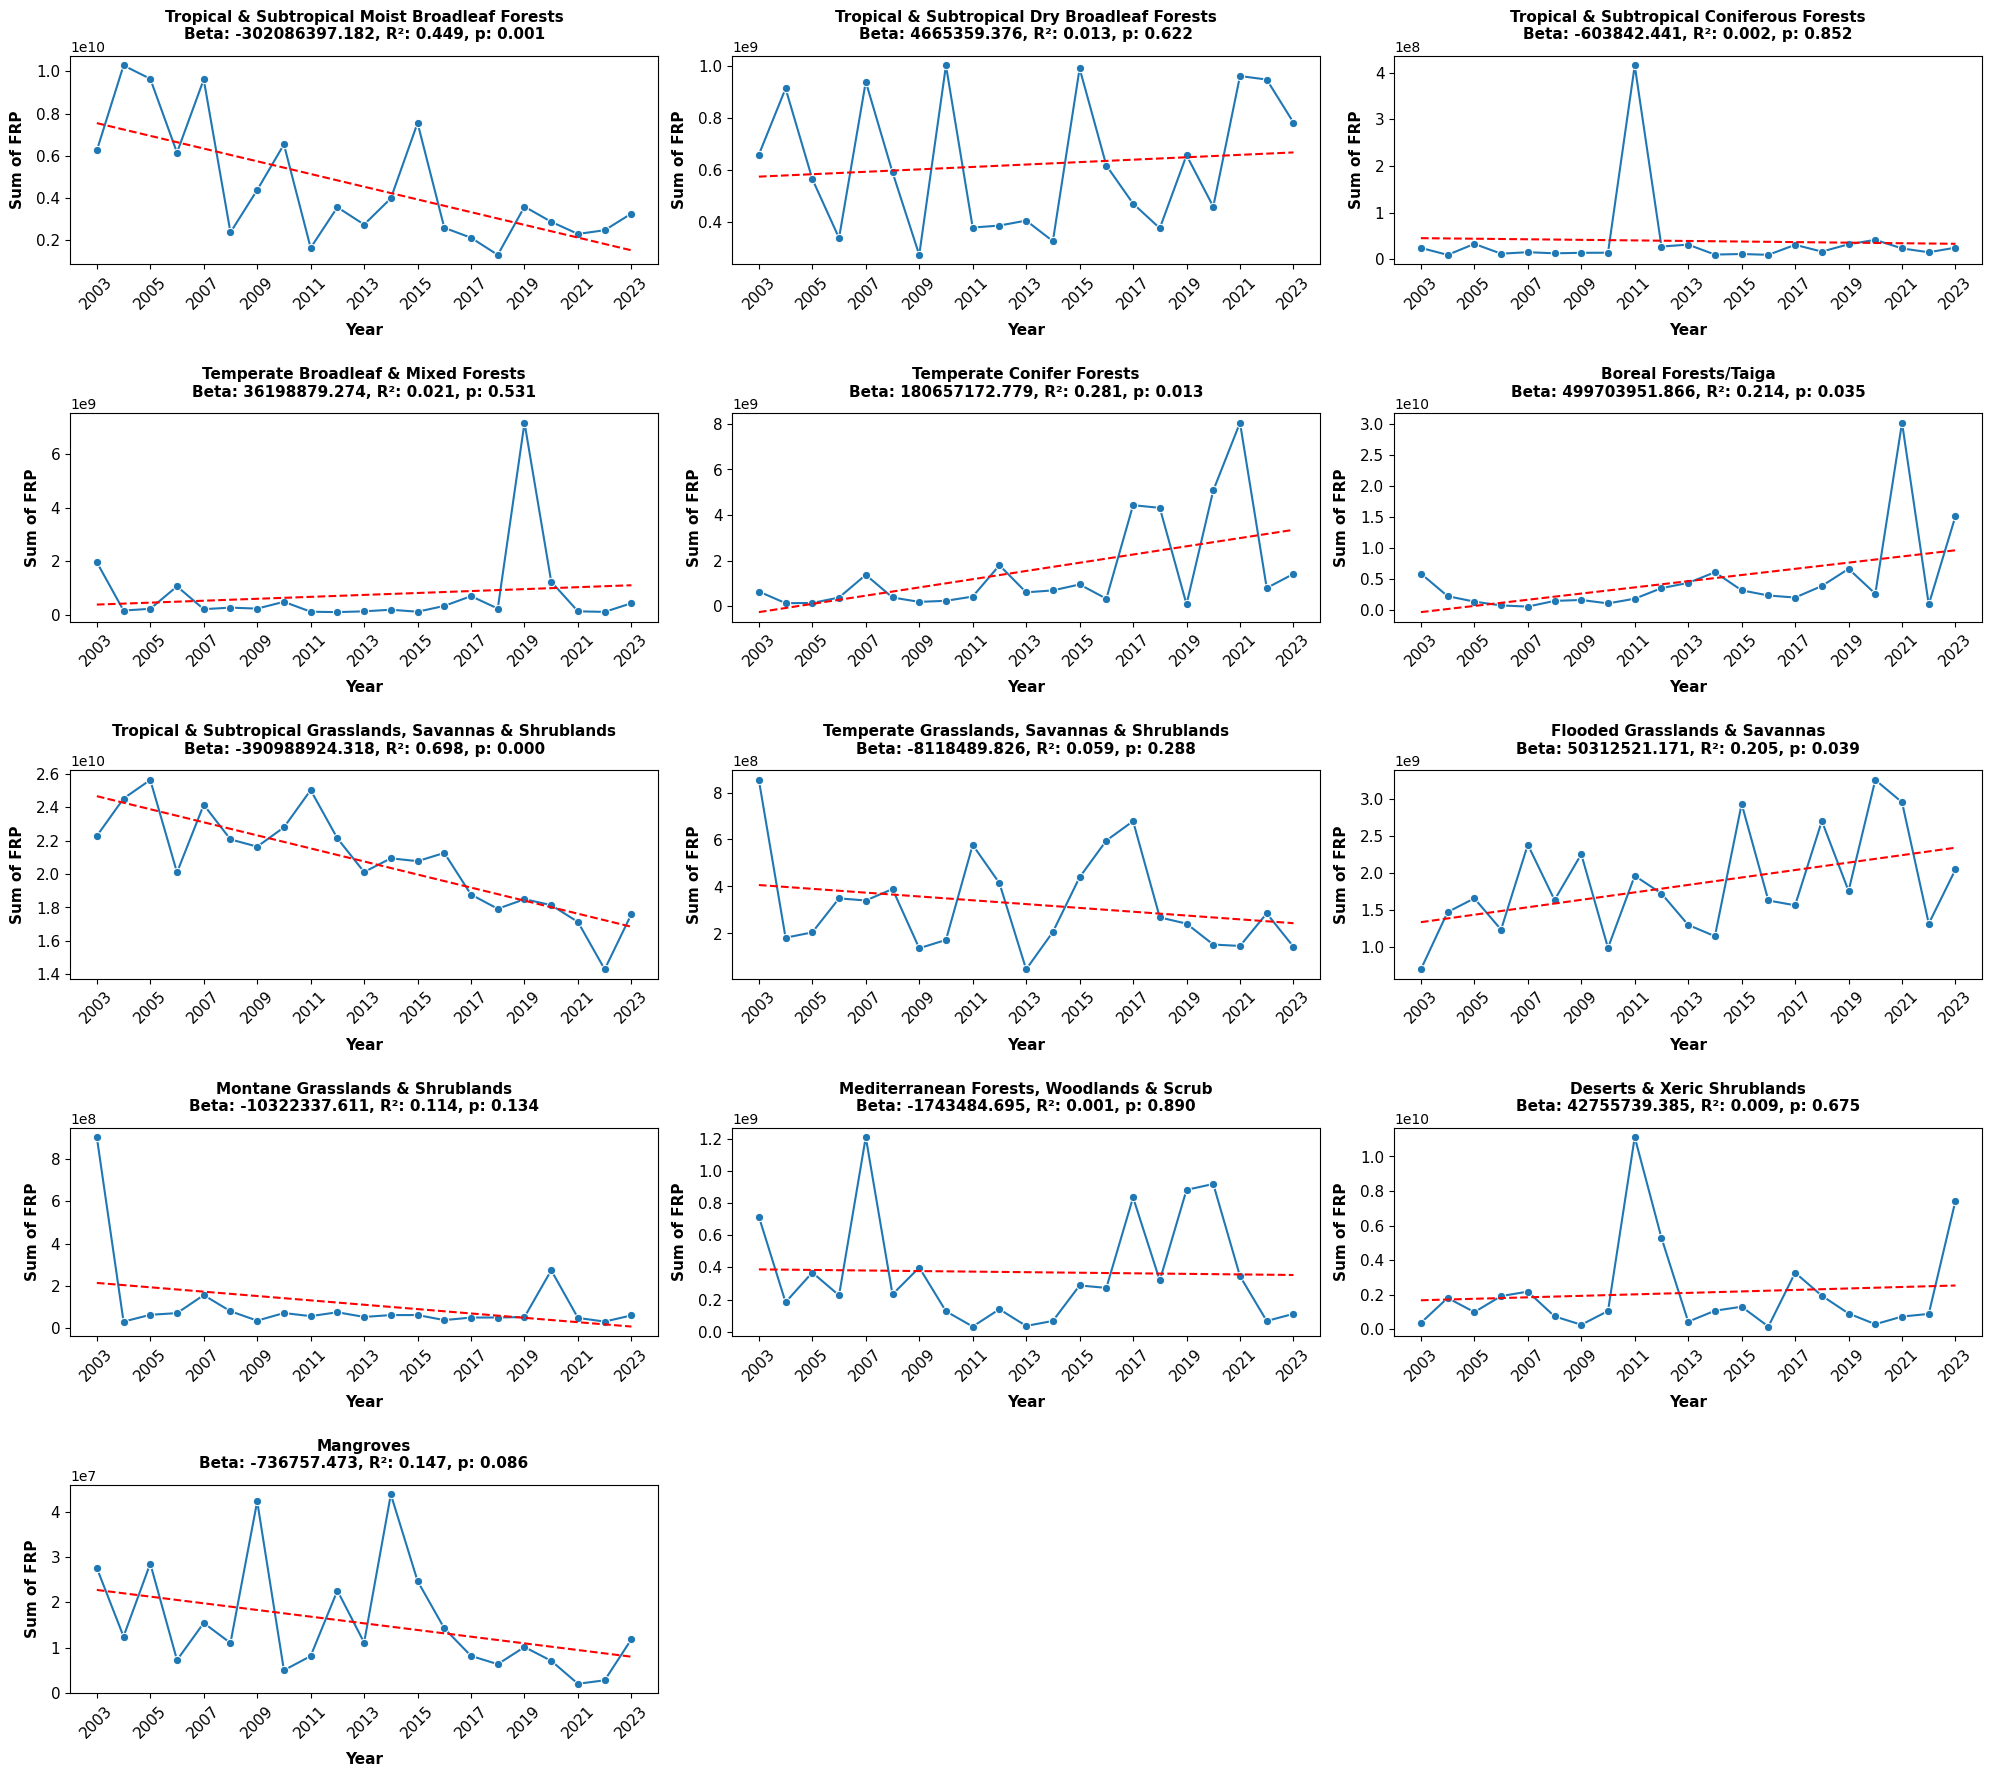

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming FRP data is already loaded as a DataFrame named 'FRP'

# Biome names based on your mapping (excluding Biome 11)
biome_names = {
    1.0: "Tropical & Subtropical Moist Broadleaf Forests",
    2.0: "Tropical & Subtropical Dry Broadleaf Forests",
    3.0: "Tropical & Subtropical Coniferous Forests",
    4.0: "Temperate Broadleaf & Mixed Forests",
    5.0: "Temperate Conifer Forests",
    6.0: "Boreal Forests/Taiga",
    7.0: "Tropical & Subtropical Grasslands, Savannas & Shrublands",
    8.0: "Temperate Grasslands, Savannas & Shrublands",
    9.0: "Flooded Grasslands & Savannas",
    10.0: "Montane Grasslands & Shrublands",
    12.0: "Mediterranean Forests, Woodlands & Scrub",
    13.0: "Deserts & Xeric Shrublands",
    14.0: "Mangroves"
}

# Convert the 'year' and 'Biome' columns to appropriate types
FRP['year'] = FRP['year'].astype(int)
FRP['Biome'] = FRP['Biome'].astype(float)

# Remove rows where Biome is NaN or Biome is 11
FRP = FRP.dropna(subset=['Biome'])
FRP = FRP[FRP['Biome'] != 11.0]  # Exclude Biome 11

# Get the unique Biome values
biomes = sorted(FRP['Biome'].unique())

# Calculate global y_min and y_max for consistent y-axis limits across all subplots
global_y_min = FRP['sum_frp'].min() * 0.9  # 10% below the minimum FRP
global_y_max = FRP['sum_frp'].max() * 1.1  # 10% above the maximum FRP

# Set up the figure for subplots with increased height
plt.figure(figsize=(20, 18))

# Loop over each unique Biome value to create subplots
for i, biome in enumerate(biomes, 1):
    # Filter data for each Biome
    biome_data = FRP[FRP['Biome'] == biome]
    
    # # Calculate the 95th percentile for this Biome cluster
    # biome_95th_percentile = biome_data['frp'].quantile(0.95)
    
    # # Filter the data to keep only values below or equal to the 95th percentile
    # biome_data_filtered = biome_data[biome_data['frp'] <= biome_95th_percentile]
    
    # Calculate yearly sum of the filtered FRP data
    yearly_sum_frp = biome_data.groupby('year')['sum_frp'].sum().reset_index()
    
    # Check if there is data available and if no NaN values are present in the columns
    if yearly_sum_frp.empty or yearly_sum_frp['sum_frp'].isnull().all():
        continue  # Skip this Biome cluster if there's no valid data
    
    # Calculate linear regression for the trend line
    slope, intercept, r_value, p_value, std_err = linregress(yearly_sum_frp['year'], yearly_sum_frp['sum_frp'])
    trend_line = intercept + slope * yearly_sum_frp['year']
    
    # Create subplot for each Biome
    plt.subplot((len(biomes) + 2) // 3, 3, i)
    sns.lineplot(data=yearly_sum_frp, x='year', y='sum_frp', marker='o')
    plt.plot(yearly_sum_frp['year'], trend_line, 'r--')
    
    # Set x-axis range with padding and ticks for each subplot
    plt.xlim(2002, 2024)  # Slightly extend the range for padding
    plt.xticks(range(2003, 2024, 2), rotation=45, fontsize=11)  # Set every 2 years for readability
    plt.yticks(fontsize=11)  # Increase y-axis tick font size
    
    # Set global y-axis limits for consistency
    plt.ylim()
    
    # Customize each subplot with the biome name and statistics below the title
    biome_name = biome_names.get(biome, f"Biome {biome}")
    plt.title(f'{biome_name}\nBeta: {slope:.3f}, R²: {r_value**2:.3f}, p: {p_value:.3f}', 
              fontsize=11, fontweight='bold', pad=12)
    plt.xlabel('Year', fontsize=11, fontweight='bold', labelpad=8)
    plt.ylabel('Sum of FRP', fontsize=11, fontweight='bold', labelpad=8)
    
    plt.grid(False)

# Adjust layout and add extra padding to prevent labels from getting cut off
plt.tight_layout(pad=1.0)
plt.show()

# Tau Cluster SUM

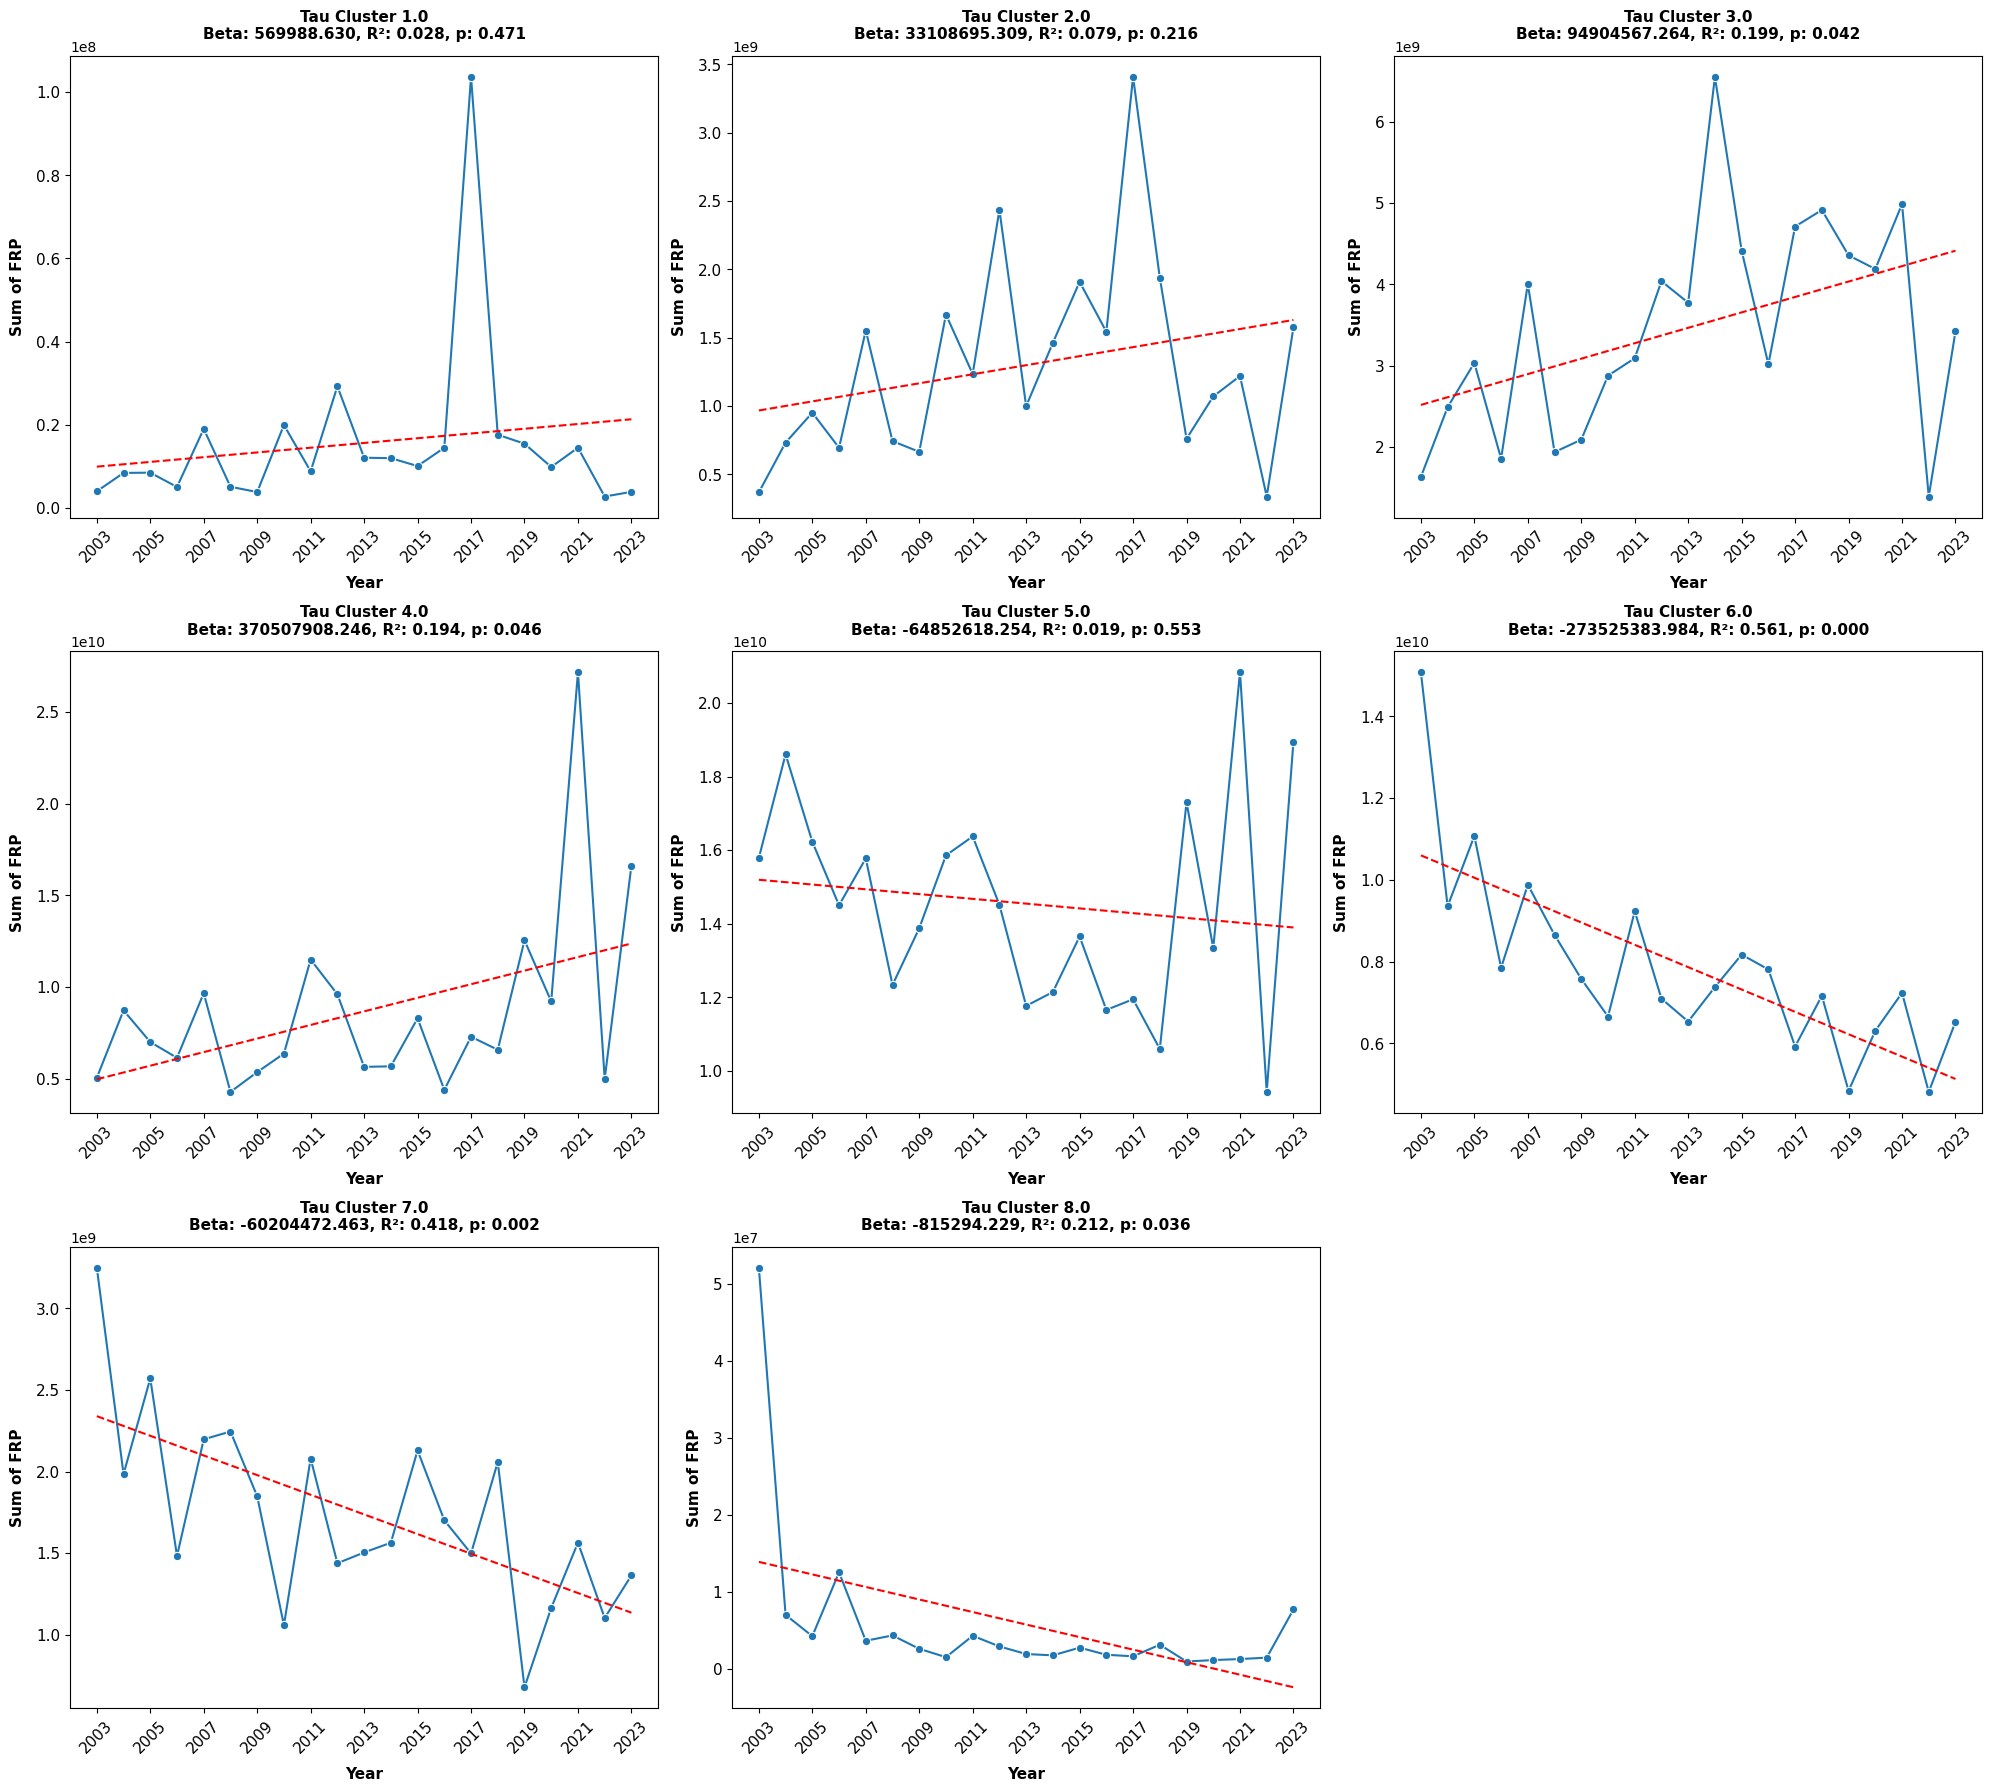

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming FRP data is already loaded as a DataFrame named 'FRP'

# Convert the 'year' and 'Tau' columns to appropriate types
FRP['year'] = FRP['year'].astype(int)
FRP['Tau'] = FRP['Tau'].astype(float)

# Remove rows where Tau is NaN
FRP = FRP.dropna(subset=['Tau'])

# Get the unique Tau values, excluding Tau = 9
taus = sorted(FRP['Tau'].unique())
taus = [tau for tau in taus if tau != 9.0]  # Remove Tau = 9

# Calculate global y_min and y_max for consistent y-axis limits across all subplots
global_y_min = FRP['sum_frp'].min() * 0.9  # 10% below the minimum FRP
global_y_max = FRP['sum_frp'].max() * 1.1  # 10% above the maximum FRP

# Set up the figure for subplots with increased height
plt.figure(figsize=(20, 18))

# Loop over each unique Tau value to create subplots
for i, tau in enumerate(taus, 1):
    # Filter data for each Tau
    tau_data = FRP[FRP['Tau'] == tau]
    
    # # Calculate the 95th percentile for this Tau cluster
    # tau_95th_percentile = tau_data['frp'].quantile(0.95)
    
    # # Filter the data to keep only values below or equal to the 95th percentile
    # tau_data_filtered = tau_data[tau_data['frp'] <= tau_95th_percentile]
    
    # Calculate yearly mean of the filtered FRP data
    yearly_mean_frp = tau_data.groupby('year')['sum_frp'].sum().reset_index()
    
    # Check if there is data available and if no NaN values are present in the columns
    if yearly_mean_frp.empty or yearly_mean_frp['sum_frp'].isnull().all():
        continue  # Skip this Tau cluster if there's no valid data
    
    # Calculate linear regression for the trend line
    slope, intercept, r_value, p_value, std_err = linregress(yearly_mean_frp['year'], yearly_mean_frp['sum_frp'])
    trend_line = intercept + slope * yearly_mean_frp['year']
    
    # Create subplot for each Tau
    plt.subplot((len(taus) + 2) // 3, 3, i)
    sns.lineplot(data=yearly_mean_frp, x='year', y='sum_frp', marker='o')
    plt.plot(yearly_mean_frp['year'], trend_line, 'r--')
    
    # Set x-axis range with padding and ticks for each subplot
    plt.xlim(2002, 2024)  # Slightly extend the range for padding
    plt.xticks(range(2003, 2024, 2), rotation=45, fontsize=11)  # Set every 2 years for readability
    plt.yticks(fontsize=11)  # Increase y-axis tick font size
    
    # Set global y-axis limits for consistency
    plt.ylim()
    
    # Customize each subplot with the Tau cluster number and statistics below the title
    plt.title(f'Tau Cluster {tau}\nBeta: {slope:.3f}, R²: {r_value**2:.3f}, p: {p_value:.3f}', 
              fontsize=11, fontweight='bold', pad=12)
    plt.xlabel('Year', fontsize=11, fontweight='bold', labelpad=8)
    plt.ylabel('Sum of FRP', fontsize=11, fontweight='bold', labelpad=8)
    
    plt.grid(False)

# Adjust layout and add extra padding to prevent labels from getting cut off
plt.tight_layout(pad=1.0)
plt.show()

# Mean

In [ ]:
# grid_gdf1 = grid_gdf
# # Calculate the sum of FRP above the 95th percentile for each grid cell, year, Tau, and Biome class
# mean_values = (
#     filtered_points.groupby(["id", "year", "Tau", "Biome"])
#     .agg(mean_frp_above_95=("frp", "mean"))
#     .reset_index()
# )

# # Merge yearly FRP sums by Tau and Biome class back to grid shapefile
# grid_gdf1 = grid_gdf1.merge(mean_values, on="id", how="left")

# # Filter out grid cells with NaN values in 'sum_frp_above_95'
# grid_gdf1 = grid_gdf1.dropna(subset=["Biome"])
# grid_gdf1

# Biome Cluster MEAN

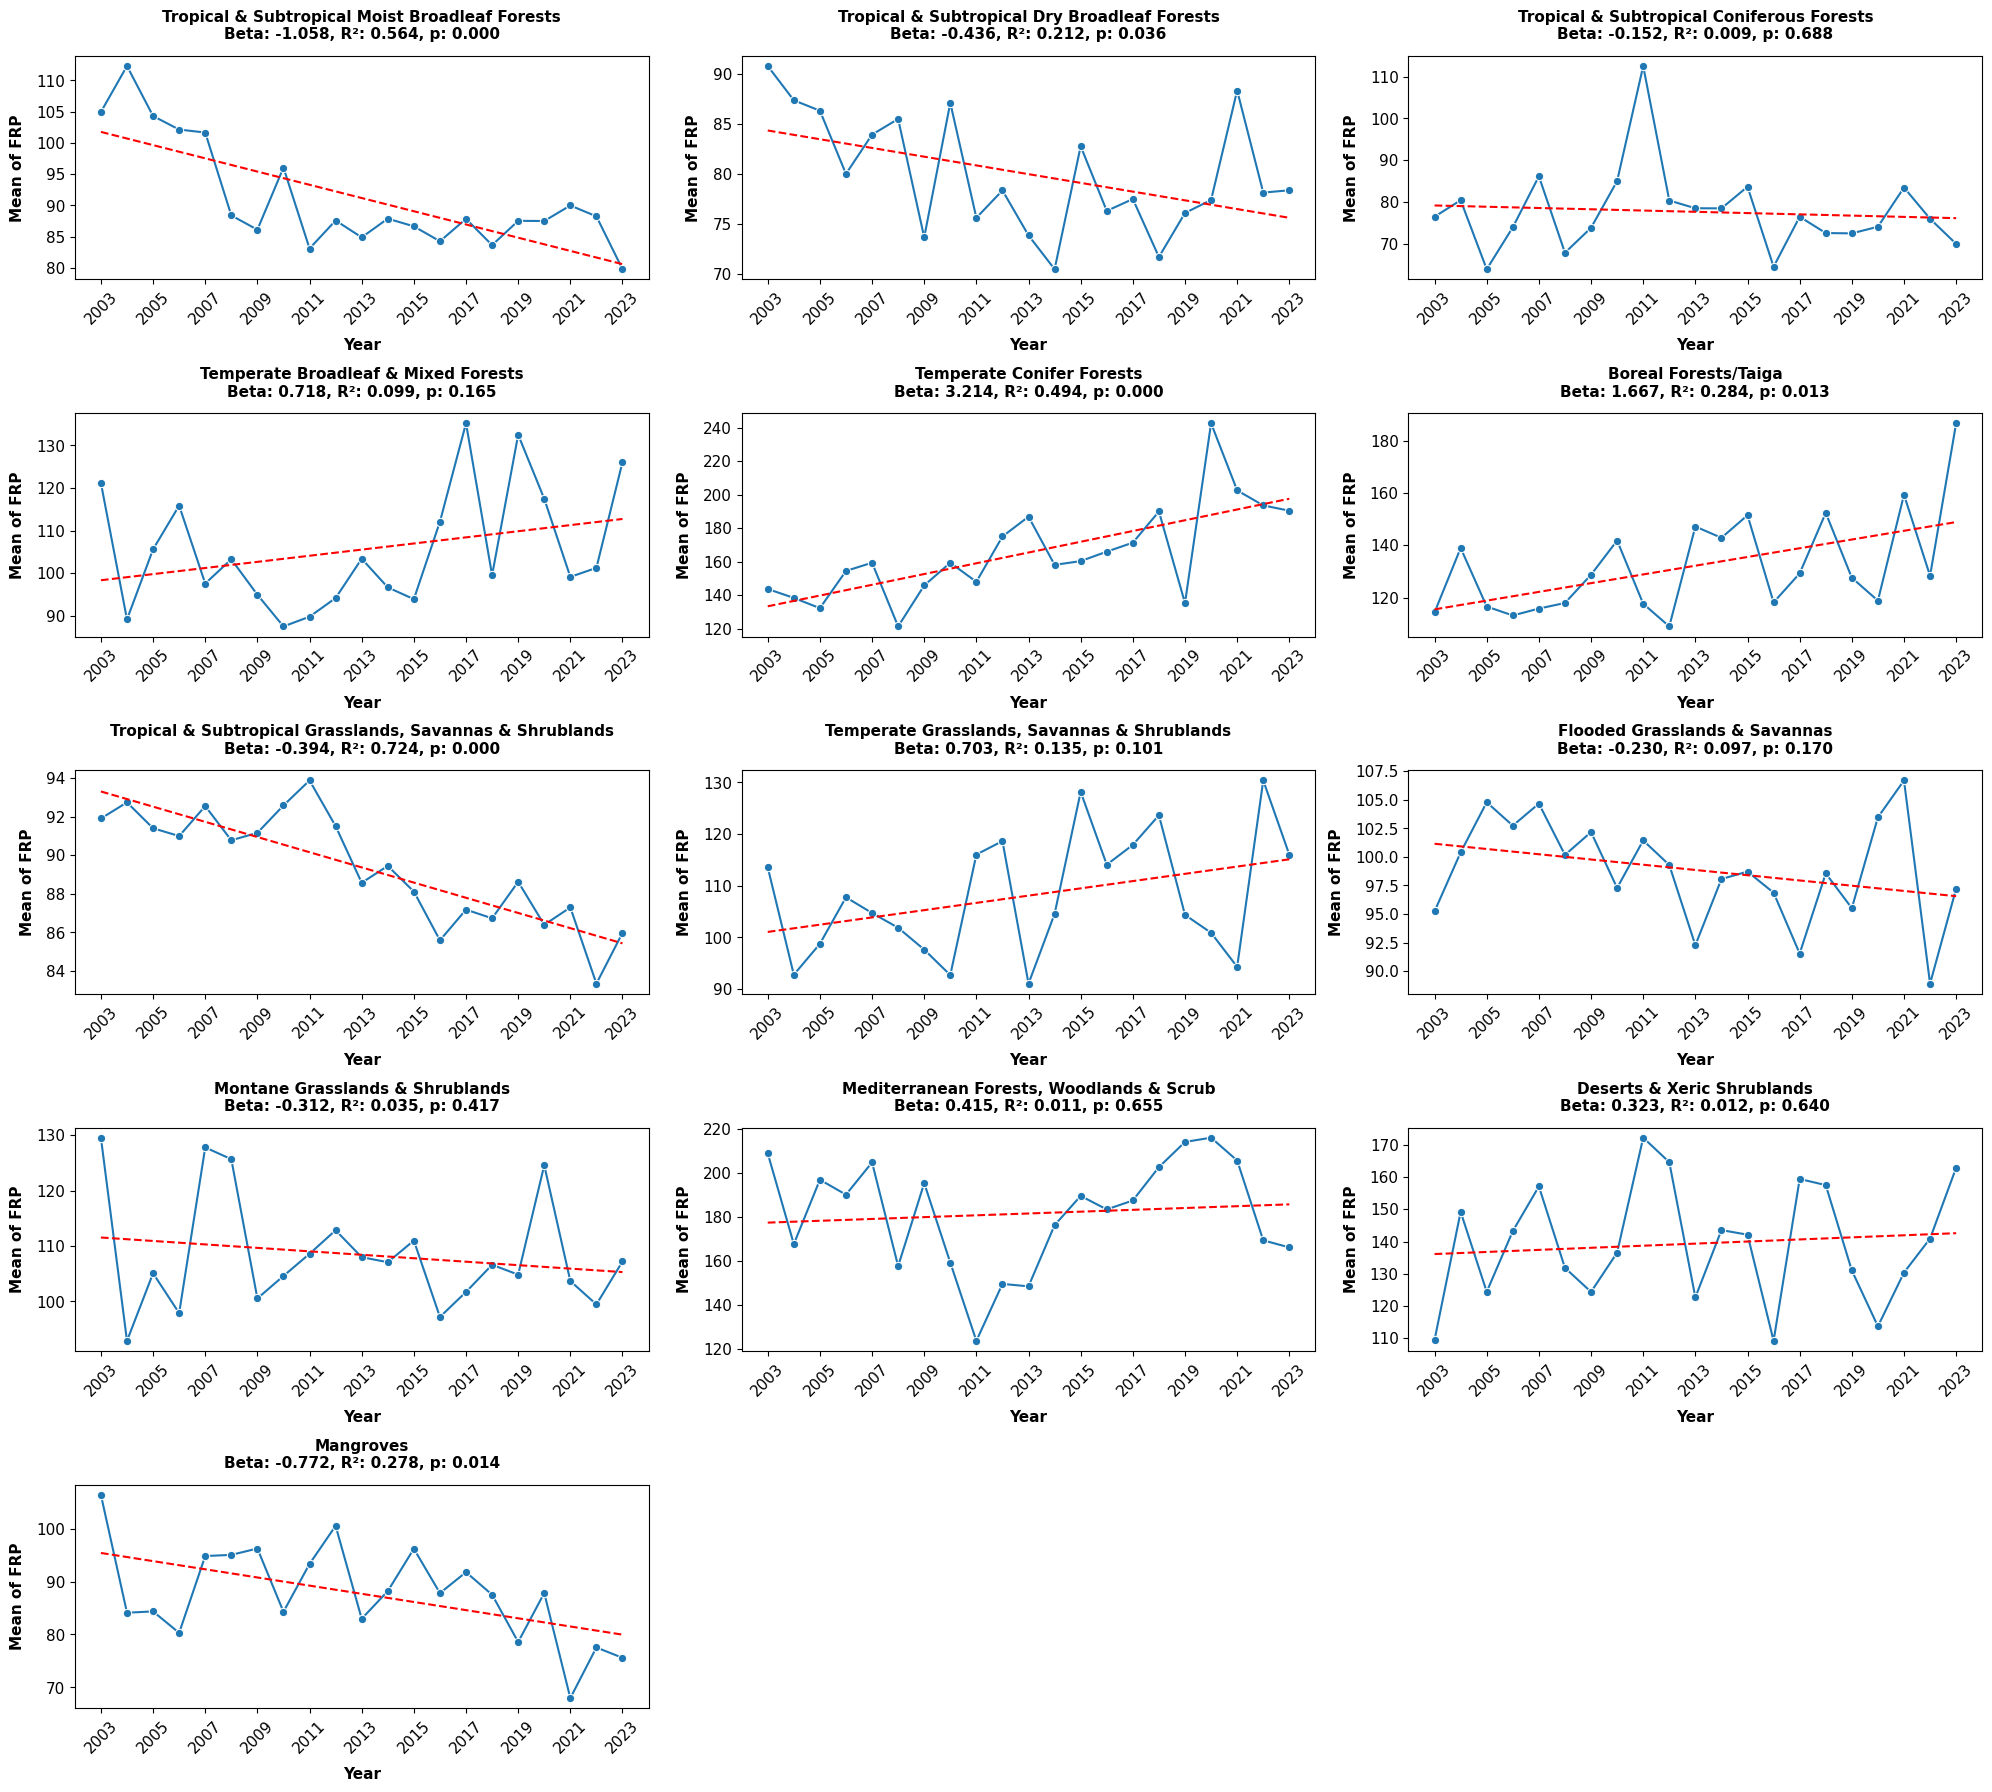

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming FRP data is already loaded as a DataFrame named 'FRP'

# Biome names based on your mapping (excluding Biome 11)
biome_names = {
    1.0: "Tropical & Subtropical Moist Broadleaf Forests",
    2.0: "Tropical & Subtropical Dry Broadleaf Forests",
    3.0: "Tropical & Subtropical Coniferous Forests",
    4.0: "Temperate Broadleaf & Mixed Forests",
    5.0: "Temperate Conifer Forests",
    6.0: "Boreal Forests/Taiga",
    7.0: "Tropical & Subtropical Grasslands, Savannas & Shrublands",
    8.0: "Temperate Grasslands, Savannas & Shrublands",
    9.0: "Flooded Grasslands & Savannas",
    10.0: "Montane Grasslands & Shrublands",
    12.0: "Mediterranean Forests, Woodlands & Scrub",
    13.0: "Deserts & Xeric Shrublands",
    14.0: "Mangroves"
}

# Convert the 'year' and 'Biome' columns to appropriate types
FRP['year'] = FRP['year'].astype(int)
FRP['Biome'] = FRP['Biome'].astype(float)

# Remove rows where Biome is NaN or Biome is 11
FRP = FRP.dropna(subset=['Biome'])
FRP = FRP[FRP['Biome'] != 11.0]  # Exclude Biome 11

# Get the unique Biome values
biomes = sorted(FRP['Biome'].unique())

# Calculate global y_min and y_max for consistent y-axis limits across all subplots
global_y_min = FRP['mean_frp'].min() * 0.9  # 10% below the minimum FRP
global_y_max = FRP['mean_frp'].max() * 1.1  # 10% above the maximum FRP

# Set up the figure for subplots with increased height
plt.figure(figsize=(20, 18))

# Loop over each unique Biome value to create subplots
for i, biome in enumerate(biomes, 1):
    # Filter data for each Biome
    biome_data = FRP[FRP['Biome'] == biome]
    
    # # Calculate the 95th percentile for this Biome cluster
    # biome_95th_percentile = biome_data['mean_frp_above_95'].quantile(0.95)
    
    # # Filter the data to keep only values below or equal to the 95th percentile
    # biome_data_filtered = biome_data[biome_data['mean_frp_above_95'] <= biome_95th_percentile]
    
    # Calculate yearly sum of the filtered FRP data
    yearly_sum_frp = biome_data.groupby('year')['mean_frp'].mean().reset_index()
    
    # Check if there is data available and if no NaN values are present in the columns
    if yearly_sum_frp.empty or yearly_sum_frp['mean_frp'].isnull().all():
        continue  # Skip this Biome cluster if there's no valid data    
    
    # Calculate linear regression for the trend line
    slope, intercept, r_value, p_value, std_err = linregress(yearly_sum_frp['year'], yearly_sum_frp['mean_frp'])
    trend_line = intercept + slope * yearly_sum_frp['year']
    
    # Create subplot for each Biome
    plt.subplot((len(biomes) + 2) // 3, 3, i)
    sns.lineplot(data=yearly_sum_frp, x='year', y='mean_frp', marker='o')
    plt.plot(yearly_sum_frp['year'], trend_line, 'r--')
    
    # Set x-axis range with padding and ticks for each subplot
    plt.xlim(2002, 2024)  # Slightly extend the range for padding
    plt.xticks(range(2003, 2024, 2), rotation=45, fontsize=11)  # Set every 2 years for readability
    plt.yticks(fontsize=11)  # Increase y-axis tick font size
    
    # Set global y-axis limits for consistency
    plt.ylim()
    
    # Customize each subplot with the biome name and statistics below the title
    biome_name = biome_names.get(biome, f"Biome {biome}")
    plt.title(f'{biome_name}\nBeta: {slope:.3f}, R²: {r_value**2:.3f}, p: {p_value:.3f}', 
              fontsize=11, fontweight='bold', pad=12)
    plt.xlabel('Year', fontsize=11, fontweight='bold', labelpad=8)
    plt.ylabel('Mean of FRP', fontsize=11, fontweight='bold', labelpad=8)
    
    plt.grid(False)

# Adjust layout and add extra padding to prevent labels from getting cut off
plt.tight_layout(pad=1.0)
plt.show()

# TAU Cluster MEAN

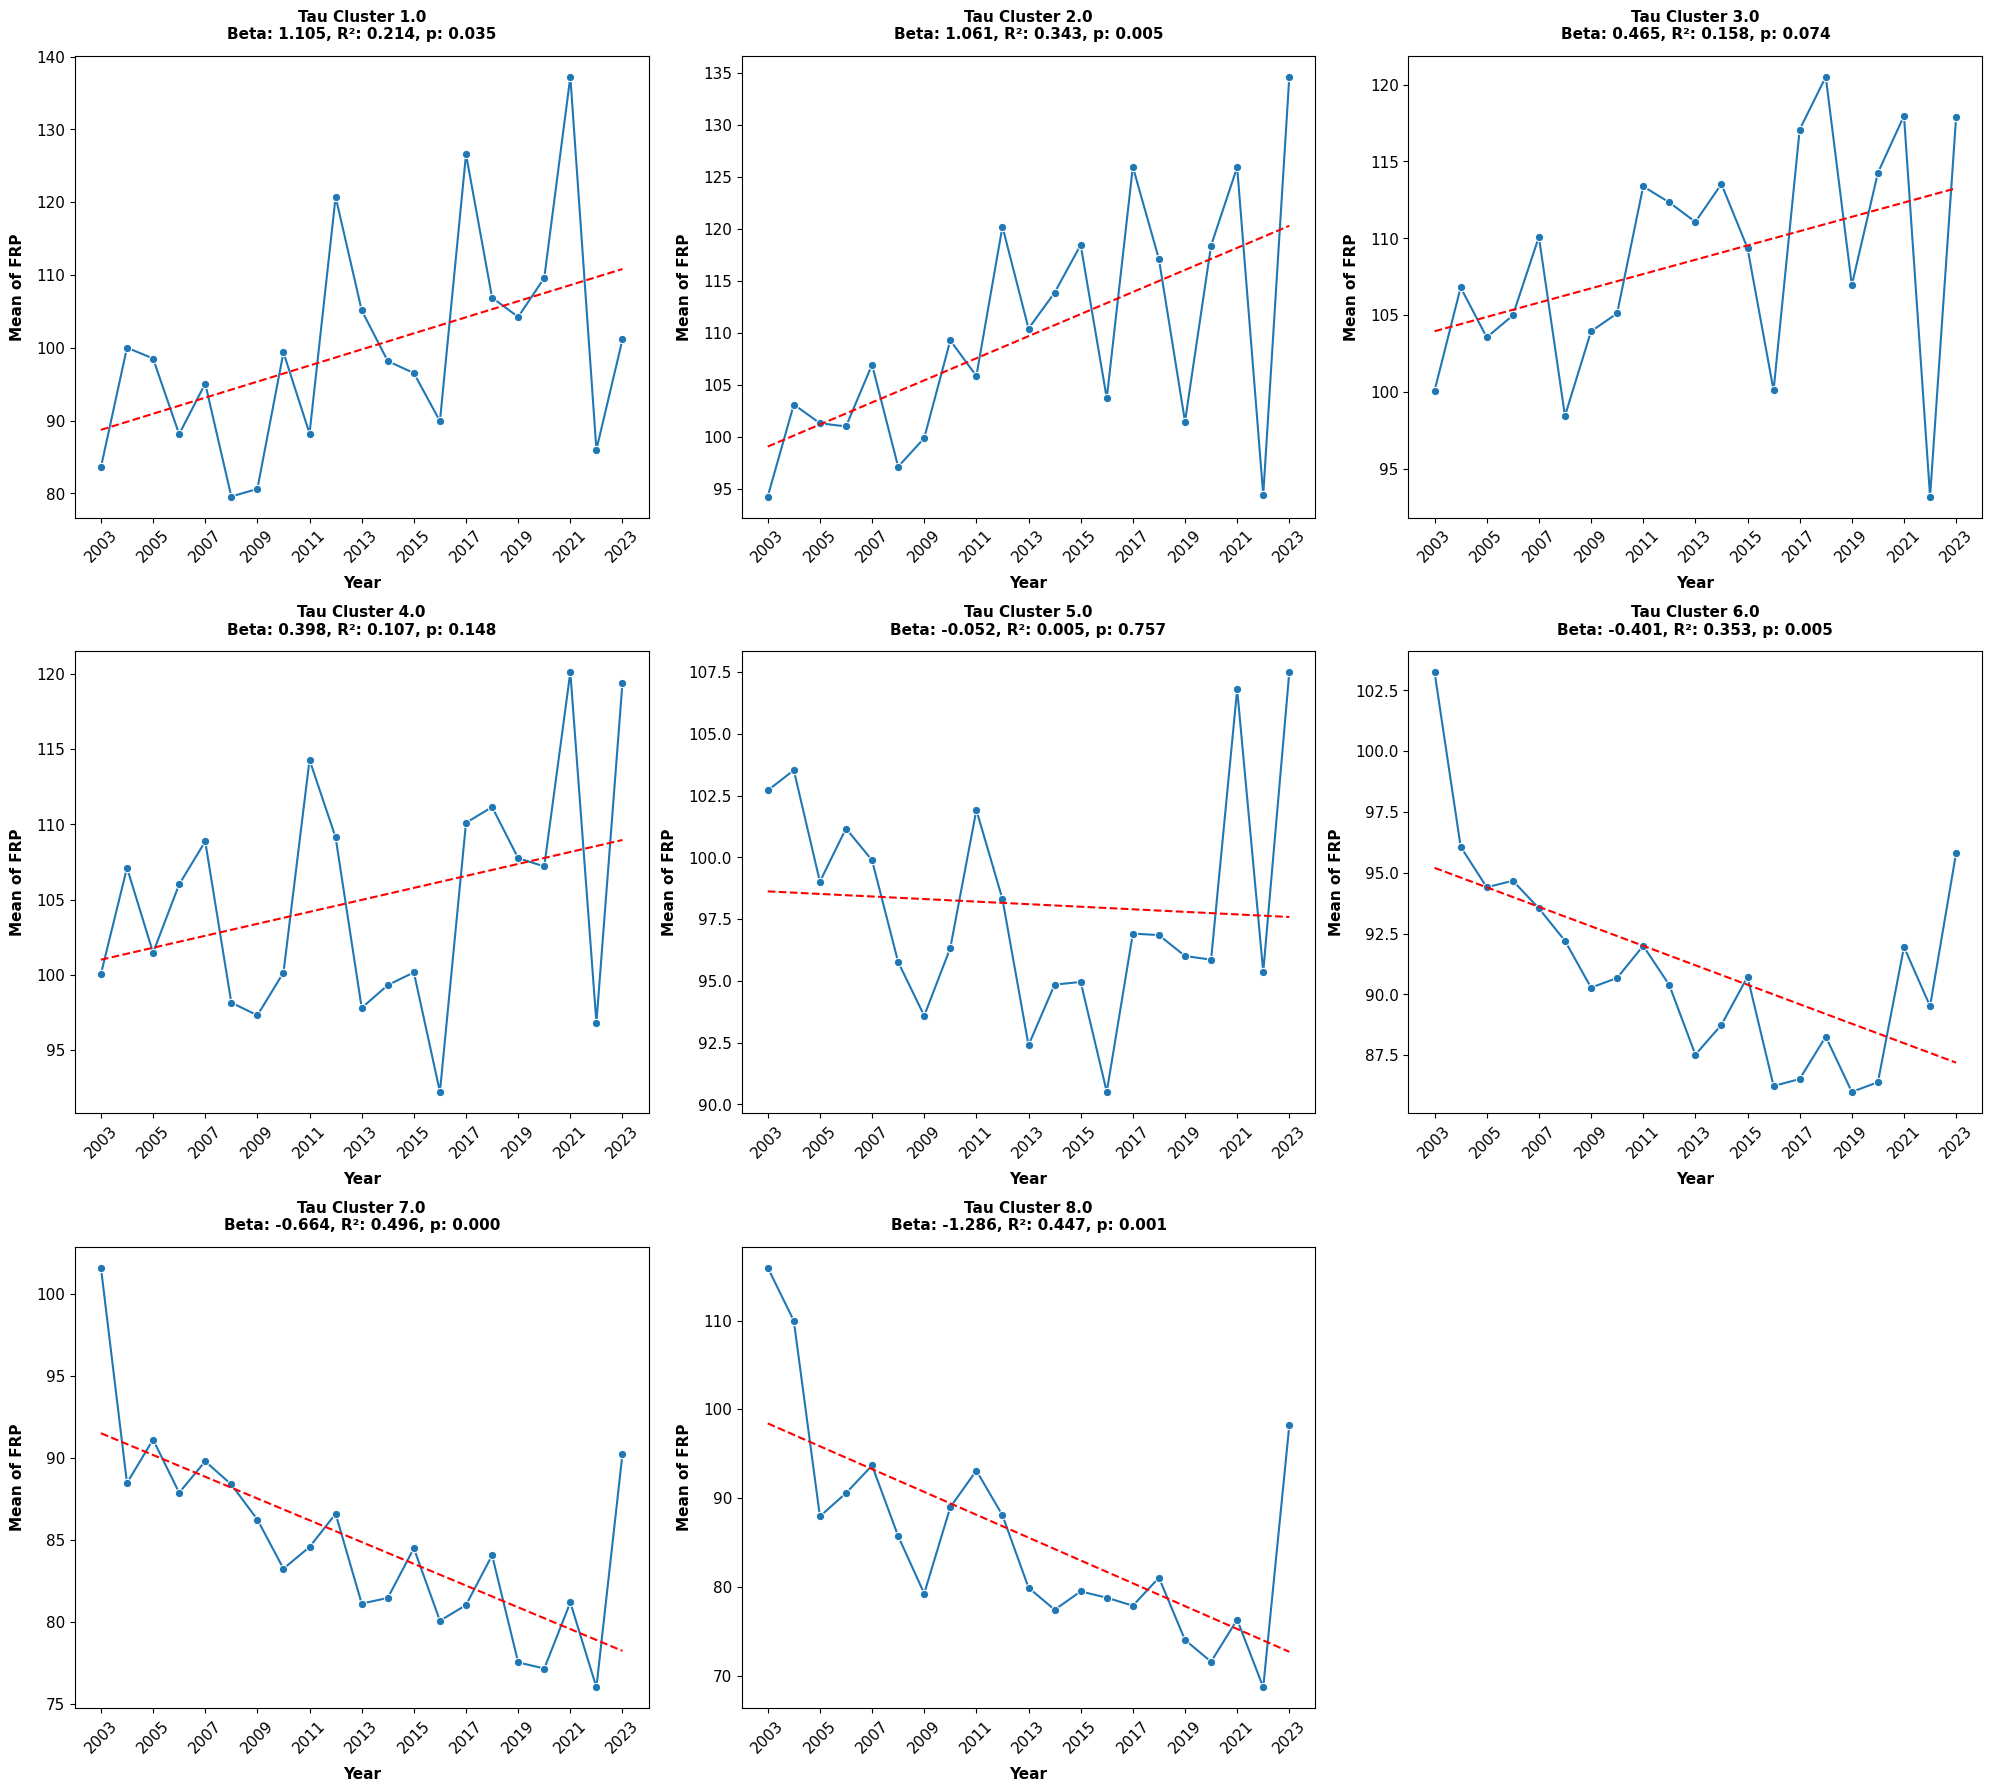

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming FRP data is already loaded as a DataFrame named 'FRP'

# Convert the 'year' and 'Tau' columns to appropriate types
FRP['year'] = FRP['year'].astype(int)
FRP['Tau'] = FRP['Tau'].astype(float)

# Remove rows where Tau is NaN
FRP = FRP.dropna(subset=['Tau'])

# Get the unique Tau values, excluding Tau = 9
taus = sorted(FRP['Tau'].unique())
taus = [tau for tau in taus if tau != 9.0]  # Remove Tau = 9

# Calculate global y_min and y_max for consistent y-axis limits across all subplots
global_y_min = FRP['mean_frp'].min() * 0.9  # 10% below the minimum FRP
global_y_max = FRP['mean_frp'].max() * 1.1  # 10% above the maximum FRP

# Set up the figure for subplots with increased height
plt.figure(figsize=(20, 18))

# Loop over each unique Tau value to create subplots
for i, tau in enumerate(taus, 1):
    # Filter data for each Tau
    tau_data = FRP[FRP['Tau'] == tau]
    
    # # Calculate the 95th percentile for this Tau cluster
    # tau_95th_percentile = tau_data['frp'].quantile(0.95)
    
    # # Filter the data to keep only values below or equal to the 95th percentile
    # tau_data_filtered = tau_data[tau_data['frp'] <= tau_95th_percentile]
    
    # Calculate yearly mean of the filtered FRP data
    yearly_mean_frp = tau_data.groupby('year')['mean_frp'].mean().reset_index()
    
    # Check if there is data available and if no NaN values are present in the columns
    if yearly_mean_frp.empty or yearly_mean_frp['mean_frp'].isnull().all():
        continue  # Skip this Tau cluster if there's no valid data
    
    # Calculate linear regression for the trend line
    slope, intercept, r_value, p_value, std_err = linregress(yearly_mean_frp['year'], yearly_mean_frp['mean_frp'])
    trend_line = intercept + slope * yearly_mean_frp['year']
    
    # Create subplot for each Tau
    plt.subplot((len(taus) + 2) // 3, 3, i)
    sns.lineplot(data=yearly_mean_frp, x='year', y='mean_frp', marker='o')
    plt.plot(yearly_mean_frp['year'], trend_line, 'r--')
    
    # Set x-axis range with padding and ticks for each subplot
    plt.xlim(2002, 2024)  # Slightly extend the range for padding
    plt.xticks(range(2003, 2024, 2), rotation=45, fontsize=11)  # Set every 2 years for readability
    plt.yticks(fontsize=11)  # Increase y-axis tick font size
    
    # Set global y-axis limits for consistency
    plt.ylim()
    
    # Customize each subplot with the Tau cluster number and statistics below the title
    plt.title(f'Tau Cluster {tau}\nBeta: {slope:.3f}, R²: {r_value**2:.3f}, p: {p_value:.3f}', 
              fontsize=11, fontweight='bold', pad=12)
    plt.xlabel('Year', fontsize=11, fontweight='bold', labelpad=8)
    plt.ylabel('Mean of FRP', fontsize=11, fontweight='bold', labelpad=8)
    
    plt.grid(False)

# Adjust layout and add extra padding to prevent labels from getting cut off
plt.tight_layout(pad=1.0)
plt.show()